---
# **WORKFLOW** 👀
*   *Start with download and analysing data*
*   *Convert data in a code readble format: labels from string to one-hot-encoding*
*   *Remove outliers and save this first processed data in data_clean.npz*
*   *Prepare all needed functions in python for data augmentation*
*   *Balance each class and generate more data (5000 imgs/class) with augmentation techniques and save this new data in data_aug.npz*
*   *Generate an other version of data augmentation with more data (11400 imgs/class) for experiments purpose and save this new data in data_aug2.npz*
*   *Create different models from scratch playing with CNN and FNN layers and with train parameters and doing the first experiments using data_clean.npz, data_aug.npz and data_aug2.npz and/or/(and not) keras model preprocessing augmentation layer*
*   *Doing this loop of train and test on CodaLab to detect the best model setup (best setup: 0.69 on CodaLab in Phase 1)*
*   *Move from a custom CNN to a pre-trained Keras default CNN application: search a keras model that fit/approximate our situation without too many parameters, with a reasonable size (Bytes) and pre-trained of RGB images with similar size (96x96)*
*   *Play around with pre-trained Keras default CNN application that we have chosen (Xception, EfficientNetB4, EfficientNetV2S): standalone and followed by FNNs*
*   *Doing this loop of train and test on CodaLab to detect the best model setup (best setup with Xception: 0.79 on CodaLab in Phase 1)*
*   **During all training phases, analyze the results of Accuracy, F1 Score and Confusion Matrix to understand which parameters to modify for subsequent trains**

---
# **GLOBAL VARIABLES**
*Managing all the key variables in one block: control each block and control all the relevant parameters*
*   *Source variables of files and directories*
*   *Fix randomness*
*   *Data management*
*   *Model parameters*
*   *Training / Transfer Learning parameters*
*   *Fine Tuning parameters*

In [ ]:
# Source variables --- DON'T CHANGE THEM ! -------------------------------------------------------------
data_name = 'data.npz'                                              # Row data
data_clean_name = 'data_clean.npz'                                  # Clean data from outliers and processed labels (one-hot-enc.)
data_aug_name = 'data_aug.npz'                                      # Clean data with data augmentation in way to balance the two classes and to have more samples
data_aug2_name = 'data_aug2.npz'                                    # Clean data with data augmentation in way to balance the two classes and to have more samples
model_dir = 'MODELS/'                                               # Directory of all models
data_dir = 'DATA/'                                                  # Directory of all data
submission_dir = 'SUBMISSIONS/'                                     # Directory of all submissions
# ------------------------------------------------------------------------------------------------------

# Fix randomness
seed = 42

# Data parameters
data_download_phase = False                                         # True : execute the data download code , False : no
data_clean_phase = False                                            # True : execute the data clean code , False : no
data_aug_phase = False                                              # True : execute the data augmentation code , False : no
data_aug2_phase = False                                             # True : execute the data augmentation v2 code , False : no
data_src = data_aug_name                                            # Data source for training/validation(/test)
data_range_01 = False                                               # Data format. True = Input Data Range (in the model) in [0.0, 1.0]   False = Input Data Range (in the model) in [0.0, 255.0]
val_size = 0.25                                                     # Validation size
test_size = 0.0                                                     # Test size . if > 0.0 the dataset is splitted in training + validation + test, otherwise just training + validation

# Model parameters
model_name_load = ''                                                # if model_name_load == '' -> Create Model, else -> Load Model
preprocessing_augmentation = True                                   # True = Keras Preprocessing Augmentation trick is active     False = Keras Preprocessing Augmentation trick is NOT active
preprocessing_augmentation_RandomFlip = "horizontal"                # Random Flip : "horizontal_and_vertical", "horizontal", "vertical" ("" is off) (only if preprocessing_augmentation = True)
preprocessing_augmentation_RandomTranslation = (0.1, 0.1)           # Random Translation : (x, y) -1.0 to 1.0 (0.0 is off) (only if preprocessing_augmentation = True)
preprocessing_augmentation_RandomRotation = 0.2                     # Random Rotation : -1.0 to 1.0 (0.0 is off) (only if preprocessing_augmentation = True)
preprocessing_augmentation_RandomZoom = 0.15                        # Random Zoom : -1.0 to 1.0 (0.0 is off) (only if preprocessing_augmentation = True)
preprocessing_augmentation_RandomBrightness = 0                     # Random Brightness : -1.0 to 1.0 (0.0 is off) (only if preprocessing_augmentation = True)
preprocessing_augmentation_RandomContrast = 0                       # Random Contrast : -1.0 to 1.0 (0.0 is off) (only if preprocessing_augmentation = True)
out_activation = 'softmax'

"""
# Last Without Keras Application Model + Transfer Learning + Fine Tuning (0.69 on CodaLab Phase 1)
layer = [
    {"type": "conv", "filters": 32, "kernel": (3,3), "activation": "relu"},
    {"type": "conv", "filters": 32, "kernel": (3,3), "activation": "relu"},
    {"type": "maxp", "kernel": (3,3)},
    {"type": "conv", "filters": 64, "kernel": (3,3), "activation": "relu"},
    {"type": "conv", "filters": 64, "kernel": (3,3), "activation": "relu"},
    {"type": "maxp", "kernel": (3,3)},
    {"type": "conv", "filters": 128, "kernel": (3,3), "activation": "relu"},
    {"type": "conv", "filters": 128, "kernel": (3,3), "activation": "relu"},
    {"type": "maxp", "kernel": (3,3)},
    {"type": "gap"}
]
"""

"""
# "Xception" Keras Application Model + Transfer Learning + Fine Tuning (Edoardo - 0.72 on CodaLab Phase 1)
layer = [
    {"type": "xception"},
    {"type": "gap"},
    {"type": "dropout", "rate": 0.2}
]
"""

"""
# "Xception" Keras Application Model + Transfer Learning + Fine Tuning (Elisa - 0.77 on CodaLab Phase 1)
layer = [
    {"type": "xception"},
    {"type": "gap"},
    {"type": "dropout", "rate": 0.2},
    {"type": "dense", "units": 32, "activation": "relu"}
]
"""

# "Xception" Keras Application Model + Transfer Learning + Fine Tuning (Alessandro - 0.79 on CodaLab Phase 1)
layer = [
    {"type": "xception"},
    {"type": "gap"},
    {"type": "dropout", "rate": 0.2},
    {"type": "dense", "units": 16, "activation": "relu"},
    {"type": "dense", "units": 32, "activation": "relu"}
]

"""
# "Xception" Keras Application Model + Transfer Learning + Fine Tuning (Alessandro - 0.728 on CodaLab Phase 2)
layer = [
    {"type": "xception"},
    {"type": "gap"},
    {"type": "dropout", "rate": 0.2},
    {"type": "dense", "units": 24, "activation": "relu"},
    {"type": "dense", "units": 32, "activation": "relu"}
]
"""

"""
# "EfficientNetB4" Keras Application Model + Transfer Learning + Fine Tuning (Edoardo - 0.743 on CodaLab Phase 2)
layer = [
    {"type": "efficientnetb4"},
    {"type": "gap"},
    {"type": "dropout", "rate": 0.2},
    {"type": "dense", "units": 16, "activation": "relu"},
    {"type": "dense", "units": 32, "activation": "relu"}
]
"""

"""
# "EfficientNetV2S" Keras Application Model + Transfer Learning + Fine Tuning (Elisa - 0.748 on CodaLab Phase 2)
layer = [
    {"type": "efficientnetv2s"},
    {"type": "gap"},
    {"type": "dropout", "rate": 0.2},
    {"type": "dense", "units": 24, "activation": "relu"},
    {"type": "dense", "units": 32, "activation": "relu"}
]
"""

# Training / Transfer Learning parameters
train = True                                                        # True = Train is active     False = Train is NOT active
batch_size = 64                                                     # Batch size
epochs = 100                                                        # Max training epochs
learning_rate = 0.001                                               # Adam Optimizer -> default learning rate = 0.001
earlystopping = True                                                # True = Keras Early Stopping trick is active     False = Keras Early Stopping trick is NOT active
earlystopping_patience = 25                                         # Early Stopping patience (only if earlystopping = True)

# Fine Tuning parameters
finetuning = True                                                   # True = Fine Tuning is active     False = Fine Tuning is NOT active
finetuning_batch_size = 64                                          # Batch size
finetuning_epochs = 40                                              # Max training epochs
finetuning_learing_rate = 1e-5                                      # Adam Optimizer -> learning rate
finetuning_earlystopping = True                                     # True = Keras Early Stopping trick is active     False = Keras Early Stopping trick is NOT active
finetuning_earlystopping_patience = 25                              # Early Stopping patience (only if earlystopping = True)

# N_layers_to_freeze = 133                                            # Number of layers to freeze in fine tuning (from 1 to 154)

---
# **GOOGLE DRIVE LINK**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/root # root directory of the project

---
# **LIBRARIES & INIT**
*Libraries*
*   **\"[os](https://docs.python.org/3/library/os.html)"** *: Create directories*
*   **\"[datetime](https://docs.python.org/3/library/datetime.html)"** *: Generate a unique name for the model*
*   **\"[random](https://docs.python.org/3/library/random.html)"** *: Fix randomness*
*   **\"[numpy](https://numpy.org/)"** *: More efficient array management*
*   **\"[pandas](https://pandas.pydata.org/)"** *: Dataframe management*
*   **\"[matplotlib](https://matplotlib.org/)"** *: Plot graphs ecc...*
*   **\"[scipy](https://scipy.org/)"** *: To zoom image in Image Process Functions (img_zoom())*
*   **\"[tensorflow](https://www.tensorflow.org/)"+"[keras](https://www.tensorflow.org/guide/keras)"** *: Tensor porpouse (More efficient array as NumPy). Create and manage the AI Model. Create and manage layers in the AI Model*
*   **\"[sklearn](https://scikit-learn.org/stable/)"** *: To split dataset in train data and test data. To calculate the summary of the train*
*   **\"[seaborn](https://seaborn.pydata.org/)"** *: To plot the confusion matrix*

\
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _\
\
*Other resources:*
*   *Create date format: https://www.w3schools.com/python/python_datetime.asp*

In [ ]:
# Libraries
import os                                                           # Import Os Library as "os"                                                               : Create directories
import datetime                                                     # Import Datetime Library as "datetime"                                                   : Generate a unique name for the model
import random                                                       # Import Random Library as "random"                                                       : Fix randomness
import numpy as np                                                  # Import NumPy Library as "np"                                                            : More efficient array management
import pandas as pd                                                 # Import Pandas Library as "pd"                                                           : Dataframe management
import matplotlib.pyplot as plt                                     # Import Pyplot Library from Matplotlib as "plt"                                          : Plot graphs ecc...
from scipy.ndimage import zoom                                      # Import zoom() Function from scipy.ndimage as "zoom"                                     : To zoom image in Image Process Functions (img_zoom())
import tensorflow as tf                                             # Import Tensorflow Library as "tf"                                                       : Tensor porpouse (More efficient array as NumPy)
from tensorflow import keras as tfk                                 # Import Keras Library from Tensorflow as "tfk"                                           : Create and manage the AI Model
from tensorflow.keras import layers as tfkl                         # Import Layers Library from Keras as "tfkl"                                              : Create and manage layers in the AI Model
from sklearn.model_selection import train_test_split                # Import train_test_split() Function from sklearn.model_selection as "train_test_split"   : To split dataset in train data and test data
import seaborn as sns                                               # Import Seaborn Library as "sns"                                                         : To plot the confusion matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix # Import accuracy_score() .... Function from sklearn.metrics as "accuracy_score" .... : To calculate the summary of the train

# Generate unique name for the model (ex. model_name = "model_2023-11-08_14.35.58")
x = datetime.datetime.now()
UTC_Italy_Rome = 1 # +1h
model_name = 'model_'+str(x.year)+"-"+str(x.month)+"-"+str(x.day)+"_"+str(x.hour + UTC_Italy_Rome)+"."+str(x.minute)+"."+str(x.second)

# Fix randomness
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Init
plt.rc('font', size=8)                                              # Pyplot set font
#tf.keras.mixed_precision.set_global_policy("mixed_float16")         # Keras mixed precision : Mixed precision training is the use of lower-precision operations (float16 and bfloat16) in a model during training to make it run faster and use less memory.
print("\033[1mTensorflow Version\033[0m:", tf.__version__)          # Tensorflow version

Tensorflow Version: 2.14.0


# [DATA PROCESS PHASE] - DATA NO OUTLIERS - Image Process Functions
To generate data from **data_clean.npz** to -> **data_aug.npz** and **data_aug2.npz**
*   *Rotation: 90deg clockwise, 90deg counterclockwise, 180deg*
*   *Flip: horizontal, vertical, horizontal and vertical*
*   *Brightness: from -1.0 (total black) to 1.0 (total white) (0.0 = normal)*
*   *Zoom: from 0.0 to 1.0 (zoom out) AND from 1.0 to +infinity (zoom in)*
*   *Random Function:*
    * *It takes an image in input and return an image with a ranom function applied to it between Rotation, Flip, Brightness and Zoom*

\
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _\
\
*Other resources:*
*   *Numpy rotate and flip: https://note.nkmk.me/en/python-opencv-numpy-rotate-flip/*
*   *Image zoom: https://stackoverflow.com/questions/37119071/scipy-rotate-and-zoom-an-image-without-changing-its-dimensions*
*   *Random int: https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html*



In [ ]:
# Rotation
def img_rotate_90_clockwise(img): # rotate 90deg clockwise
  return np.rot90(img, 3)
def img_rotate_90_counterclockwise(img): # rotate 90deg counterclockwise
  return np.rot90(img)
def img_rotate_180(img): # rotate 180deg
  return np.rot90(img, 2)

# Flip
def img_flip_horizontal(img): # flip horizontal
  return np.fliplr(img)
def img_flip_vertical(img): # flip vertical
  return np.flipud(img)
def img_flip_horizontal_and_vertical(img): # flip horizontal and vertical
  return np.flip(img, (0, 1))

# Brightness
def img_brightness(img, factor=0.0): # brightness - factor from -1.0 (total black) to 1.0 (total white)
  factor = float(255.0 * float(factor))
  out = img + factor
  # CLIP IMAGE IN RANGE [0, 255]
  r = 0
  while r < len(out) :
    p = 0
    while p < len(out[r]) :
      e = 0
      while e < len(out[r][p]) :
        if out[r][p][e] < 0.0:
          out[r][p][e] = 0.0
        elif out[r][p][e] > 255.0:
          out[r][p][e] = 255.0
        e += 1
      p +=1
    r += 1
  return out

# Zoom
def img_zoom(img, zoom_factor=1.0, **kwargs): # zoom by a factor from 0.0 to 1.0 (zoom out) AND from 1.0 to +infinity (zoom in)
    # img_zoommed = img_zoom(img, 1.5)
    h, w = img.shape[:2]
    # For multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)
    # Zooming out
    if zoom_factor < 1:
        # Bounding box of the zoomed-out image within the output array
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2
        # Zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)
    # Zooming in
    elif zoom_factor > 1:
        # Bounding box of the zoomed-in region within the input array
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2
        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)
        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]
    # If zoom_factor == 1, just return the input array
    else:
        out = img
    # MAP IMAGE IN RANGE [0, 255]
    max = out.max()
    min = out.min()
    if(min < 0): # map from [min, max] to [0, max]
      toMin = 0
      toMax = max
      out = toMin + ( ((out - float(min)) / float(max - min)) * float(toMax - toMin))
      max = out.max()
      min = out.min()
    if(max > 255): # map from [min, max] to [min, 255]
      toMin = min
      toMax = 255
      out = toMin + ( ((out - float(min)) / float(max - min)) * float(toMax - toMin))
    return out

# Random Function
def img_random_function(img):
  n = random.randint(1, 9)
  if n == 1:
    return img_rotate_90_clockwise(img)
  elif n == 2:
    return img_rotate_90_counterclockwise(img)
  elif n == 3:
    return img_rotate_180(img)
  elif n == 4:
    return img_flip_horizontal(img)
  elif n == 5:
    return img_flip_vertical(img)
  elif n == 6:
    return img_flip_horizontal_and_vertical(img)
  elif n == 7:
    return img_brightness(img, 0.2)
  elif n == 8:
    return img_brightness(img, -0.2)
  else: # n == 9
    return img_zoom(img, 1.2)

"\n# Rotation\ndef img_rotate_90_clockwise(img): # rotate 90deg clockwise\n  return np.rot90(img, 3)\ndef img_rotate_90_counterclockwise(img): # rotate 90deg counterclockwise\n  return np.rot90(img)\ndef img_rotate_180(img): # rotate 180deg\n  return np.rot90(img, 2)\n\n# Flip\ndef img_flip_horizontal(img): # flip horizontal\n  return np.fliplr(img)\ndef img_flip_vertical(img): # flip vertical\n  return np.flipud(img)\ndef img_flip_horizontal_and_vertical(img): # flip horizontal and vertical\n  return np.flip(img, (0, 1))\n\n# Brightness\ndef img_brightness(img, factor=0.0): # brightness - factor from -1.0 (total black) to 1.0 (total white)\n  factor = float(255.0 * float(factor))\n  out = img + factor\n  # CLIP IMAGE IN RANGE [0, 255]\n  r = 0\n  while r < len(out) :\n    p = 0\n    while p < len(out[r]) :\n      e = 0\n      while e < len(out[r][p]) :\n        if out[r][p][e] < 0.0:\n          out[r][p][e] = 0.0\n        elif out[r][p][e] > 255.0:\n          out[r][p][e] = 255.0\n   

---
# [DATA PROCESS PHASE] - DOWNLOAD IMAGES FROM ROW DATA (data.npz)
*For inspection porpouse, become familiar with the data, find outliers ecc...*

\
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _\
\
*Other resources:*
*   *Save images: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html*

In [ ]:
if data_download_phase:
  images = np.load(data_src)["data"].astype(int)
  idx = 0
  for i in images:
    plt.imshow(i)
    plt.savefig('DATA/img/'+str(idx)+'.jpg')
    idx += 1

"""
if data_download_phase:
  fromIndex = 4659 # included
  toIndex = 5199 # included
  images = np.load(data_src)["data"].astype(int)
  while fromIndex <= toIndex:
    plt.imshow(images[fromIndex])
    plt.savefig('DATA/img/'+str(fromIndex)+'.jpg')
    print(fromIndex)
    fromIndex += 1
"""

'\nfromIndex = 4659 # included\ntoIndex = 5199 # included\nimages = np.load(data_src)["data"].astype(int)\nwhile fromIndex <= toIndex:\n  plt.imshow(images[fromIndex])\n  plt.savefig(\'DATA/img/\'+str(fromIndex)+\'.jpg\')\n  print(fromIndex)\n  fromIndex += 1\n'

---
# [DATA PROCESS PHASE] - ROW DATA - Load (data.npz)
*   *Load row data*
*   *Inspect row data & labels*

In [ ]:
if data_clean_phase:
  # Load Row Data
  dataLoad = np.load(data_dir+data_name, allow_pickle=True)

  # Inspect Row Data & Labels
  print("\033[1mRow Data Shape\033[0m:", dataLoad["data"].shape)
  print("\033[1mRow Labels Shape\033[0m:", dataLoad["labels"].shape)
  print("\033[1mRow Data\033[0m: [ image_0 -> [ row_0 -> [ pixel_0 -> ", dataLoad["data"][0][0][0], ", ...", "]]]")
  print("\033[1mRow Labels\033[0m: ", dataLoad["labels"])

'\n# Load Row Data\ndataLoad = np.load(data_dir+data_name, allow_pickle=True)\n\n# Inspect Row Data & Labels\nprint("\x1bRow Data Shape\x1b:", dataLoad["data"].shape)\nprint("\x1bRow Labels Shape\x1b:", dataLoad["labels"].shape)\nprint("\x1bRow Data\x1b: [ image_0 -> [ row_0 -> [ pixel_0 -> ", dataLoad["data"][0][0][0], ", ...", "]]]")\nprint("\x1bRow Labels\x1b: ", dataLoad["labels"])\n'

# [DATA PROCESS PHASE] - ROW DATA - Plot

In [ ]:
if data_clean_phase:
  inspect_img = (0, 9) # Image range to view [from, to] -> Extremes are included

  inspect_data = dataLoad["data"]
  inspect_labels = dataLoad["labels"]

  # Plot Images
  inspect_num_img = inspect_img[1] - inspect_img[0] + 1 # Extremes [0] [1] are included
  if inspect_num_img > 0:
    print("\n\033[1mImages\033[0m ["+str(inspect_img[0])+", "+str(inspect_img[1])+"]:")
    ini_array = int(float(inspect_num_img) / 10.0)
    ini_array_rest = inspect_num_img - (ini_array * 10)
    subimg_array = []
    for i in range(ini_array):
      subimg_array.append(10)
    if ini_array_rest > 0:
      subimg_array.append(ini_array_rest)
    z = 0
    for j in subimg_array:
      fig, axes = plt.subplots(1, j, figsize=(j*2, j*2))
      for i in range(j):
        if j == 1:
          ax = axes
        else:
          ax = axes[i % j]
        ax.imshow(inspect_data[i + inspect_img[0] + z].astype(int))
        ax.set_title(str(i + inspect_img[0] + z)+': '+str(inspect_labels[i + inspect_img[0] + z]))
      plt.tight_layout()
      plt.show()
      z += 10

'\ninspect_img = (0, 9) # Image range to view [from, to] -> Extremes are included\n\ninspect_data = dataLoad["data"]\ninspect_labels = dataLoad["labels"]\n\n# Plot Images\ninspect_num_img = inspect_img[1] - inspect_img[0] + 1 # Extremes [0] [1] are included\nif inspect_num_img > 0:\n  print("\n\x1bImages\x1b ["+str(inspect_img[0])+", "+str(inspect_img[1])+"]:")\n  ini_array = int(float(inspect_num_img) / 10.0)\n  ini_array_rest = inspect_num_img - (ini_array * 10)\n  subimg_array = []\n  for i in range(ini_array):\n    subimg_array.append(10)\n  if ini_array_rest > 0:\n    subimg_array.append(ini_array_rest)\n  z = 0\n  for j in subimg_array:\n    fig, axes = plt.subplots(1, j, figsize=(j*2, j*2))\n    for i in range(j):\n      if j == 1:\n        ax = axes\n      else:\n        ax = axes[i % j]\n      ax.imshow(inspect_data[i + inspect_img[0] + z].astype(int))\n      ax.set_title(str(i + inspect_img[0] + z)+\': \'+str(inspect_labels[i + inspect_img[0] + z]))\n    plt.tight_layout()\n 

# [DATA PROCESS PHASE] - ROW DATA - Process
*   *Convert labels: string -> integers (factorized) -> list of classes (one-hot-encoding)*
*   *Map labels in their names*
*   *Map labels in their dimension (number of sample of each class)*
*   *Inspect process data*
*   *Inspect labels map*

\
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _\
\
*Other resources:*
*   *Pandas factorize: https://pandas.pydata.org/docs/reference/api/pandas.factorize.html*

In [ ]:
if data_clean_phase:
  # Data (Input)
  data = (dataLoad["data"])

  # Preprocess Labels (Factorize) : ['healthy', 'unhealthy', 'unhealthy', ..., 'healthy'] -> [0, 1, 1, ..., 0]
  labels, _ = pd.factorize(dataLoad["labels"])

  # Find Classes (unique = [0, 1]) and their relative Count (count = [3199, 2001])
  unique, count = np.unique(labels, return_counts=True)

  # Preprocess Labels (One-Hot-Encoding) : [0, 1, 1, ..., 0] -> [ [1,0], [0,1], [0,1], ..., [1,0] ]
  labels = tfk.utils.to_categorical(labels)

  # Preprocess Classes Unique (One-Hot-Encoding) : [0, 1] -> [ [1,0], [0,1] ]
  unique = tfk.utils.to_categorical(unique).astype(int)

  # Convert Classes Unique into tuple : [ [1,0], [0,1] ] -> [ (1,0), (0,1) ]
  uni = unique
  unique = []
  for u in uni:
    unique.append(tuple(u))

  # Map Factorized labels in Row labels : {(1,0) : 'healthy', (0,1) : 'unhealthy'}
  labels_name = dict(map(lambda i,j : (i,j) , unique,np.unique(dataLoad["labels"])))

  # Map each labels with its respective count {(1,0) : 3199, (0,1) : 2001}
  labels_count = dict(map(lambda i,j : (i,j) , unique,count))

  # Inspect Process Data
  print("\n\033[1mProcessed Data Shape\033[0m:", data.shape)
  print("\033[1mProcessed Labels Shape\033[0m:", labels.shape)
  print("\033[1mProcessed Data\033[0m: [ image_0 -> [ row_0 -> [ pixel_0 -> ", data[0][0][0], ", ...", "]]]")
  print("\033[1mProcessed Labels\033[0m: [", *labels, "]")

  # Inspect Labels Map
  print("\n\033[1mLabels Name\033[0m:", labels_name)
  print("\033[1mLabels Count\033[0m:", labels_count)

'\n# Data (Input)\ndata = (dataLoad["data"])\n\n# Preprocess Labels (Factorize) : [\'healthy\', \'unhealthy\', \'unhealthy\', ..., \'healthy\'] -> [0, 1, 1, ..., 0]\nlabels, _ = pd.factorize(dataLoad["labels"])\n\n# Find Classes (unique = [0, 1]) and their relative Count (count = [3199, 2001])\nunique, count = np.unique(labels, return_counts=True)\n\n# Preprocess Labels (One-Hot-Encoding) : [0, 1, 1, ..., 0] -> [ [1,0], [0,1], [0,1], ..., [1,0] ]\nlabels = tfk.utils.to_categorical(labels)\n\n# Preprocess Classes Unique (One-Hot-Encoding) : [0, 1] -> [ [1,0], [0,1] ]\nunique = tfk.utils.to_categorical(unique).astype(int)\n\n# Convert Classes Unique into tuple : [ [1,0], [0,1] ] -> [ (1,0), (0,1) ]\nuni = unique\nunique = []\nfor u in uni:\n  unique.append(tuple(u))\n\n# Map Factorized labels in Row labels : {(1,0) : \'healthy\', (0,1) : \'unhealthy\'}\nlabels_name = dict(map(lambda i,j : (i,j) , unique,np.unique(dataLoad["labels"])))\n\n# Map each labels with its respective count {(1,0)

# [DATA PROCESS PHASE] - ROW DATA - Outliers
*   *Remove outliers samples (find indexes by manual inspection of the data)*
 *   *Find the first index of each outlier by manual inspection of the data*
 *   *Find all outlier indexes by automated inspection of the data starting from indexes find before*
*   *Map new labels in their new dimension (number of sample)*
*   *Inspect outliers and new process data*
*   *Inspect labels map*

\
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _\
\
*Other resources:*
*   *Numpy delete: https://numpy.org/doc/stable/reference/generated/numpy.delete.html*

In [ ]:
if data_clean_phase:
  # Outlier first indexes (find by manual inspection of the data)
  shrekIndex = 58     # "Funny" Shrek 😒
  trololoIndex = 338  # "Not So Much Funny" Trololo 😡

  # Collect all the outlier indexes in "outlierIndexes" list (automated inspection of the data)
  outlierIndexes = []
  for i in range(len(data)):
    if(np.all(data[i] == data[shrekIndex])):
      outlierIndexes.append(i)
    elif(np.all(data[i] == data[trololoIndex])):
      outlierIndexes.append(i)

  # Remove outliers
  data = np.delete(data, outlierIndexes, 0)
  labels = np.delete(labels, outlierIndexes, 0)

  # Re-calc labels count = Map each labels with its respective count {(1, 0) : 3199, (0, 1) : 2001}
  lbs = np.argmax(labels,axis=1)
  unique, count = np.unique(lbs, return_counts=True)
  unique = tfk.utils.to_categorical(unique).astype(int)
  uni = unique
  unique = []
  for u in uni:
    unique.append(tuple(u))
  labels_count = dict(map(lambda i,j : (i,j) , unique,count))

  # Inspect Outliers and New Process Data
  print("\033[1mOutlier Indexes\033[0m:", outlierIndexes)
  print("\n\033[1mProcessed Data Shape\033[0m:", data.shape)
  print("\033[1mProcessed Labels Shape\033[0m:", labels.shape)

  # Inspect Labels Map
  print("\n\033[1mLabels Name\033[0m:", labels_name)
  print("\033[1mLabels Count\033[0m:", labels_count)

'\n# Outlier first indexes (find by manual inspection of the data)\nshrekIndex = 58     # "Funny" Shrek 😒\ntrololoIndex = 338  # "Not So Much Funny" Trololo 😡\n\n# Collect all the outlier indexes in "outlierIndexes" list (automated inspection of the data)\noutlierIndexes = []\nfor i in range(len(data)):\n  if(np.all(data[i] == data[shrekIndex])):\n    outlierIndexes.append(i)\n  elif(np.all(data[i] == data[trololoIndex])):\n    outlierIndexes.append(i)\n\n# Remove outliers\ndata = np.delete(data, outlierIndexes, 0)\nlabels = np.delete(labels, outlierIndexes, 0)\n\n# Re-calc labels count = Map each labels with its respective count {(1, 0) : 3199, (0, 1) : 2001}\nlbs = np.argmax(labels,axis=1)\nunique, count = np.unique(lbs, return_counts=True)\nunique = tfk.utils.to_categorical(unique).astype(int)\nuni = unique\nunique = []\nfor u in uni:\n  unique.append(tuple(u))\nlabels_count = dict(map(lambda i,j : (i,j) , unique,count))\n\n# Inspect Outliers and New Process Data\nprint("\x1bOutlier

# [DATA PROCESS PHASE] - ROW DATA - Outliers Plot

In [ ]:
if data_clean_phase:
  # Plot Outlier Shrek 😒
  fig, axes = plt.subplots(1, 1, figsize=(2, 2))
  axes.imshow(dataLoad["data"][shrekIndex].astype(int))
  axes.set_title("Outlier Shrek 😒")
  plt.tight_layout()
  plt.show()

  # Plot Outlier Trololo 😡
  fig, axes = plt.subplots(1, 1, figsize=(2, 2))
  axes.imshow(dataLoad["data"][trololoIndex].astype(int))
  axes.set_title("Outlier Trololo 😡")
  plt.tight_layout()
  plt.show()

'\n# Plot Outlier Shrek 😒\nfig, axes = plt.subplots(1, 1, figsize=(2, 2))\naxes.imshow(dataLoad["data"][shrekIndex].astype(int))\naxes.set_title("Outlier Shrek 😒")\nplt.tight_layout()\nplt.show()\n\n# Plot Outlier Trololo 😡\nfig, axes = plt.subplots(1, 1, figsize=(2, 2))\naxes.imshow(dataLoad["data"][trololoIndex].astype(int))\naxes.set_title("Outlier Trololo 😡")\nplt.tight_layout()\nplt.show()\n'

# [DATA PROCESS PHASE] - DATA NO OUTLIERS - Save (data_clean.npz)
*   *data = [... [25. , 50. , 230.] ...]*
*   *labels = [ [1. 0.] , [0. 1.] , [1. 0.] ...]*
*   *Outliers are removed*
*   *Save labels map name and count into "info"*
*   *Save data*

\
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _\
\
*Other resources:*
*   *Numpy savez: https://numpy.org/doc/stable/reference/generated/numpy.savez.html*

In [ ]:
if data_clean_phase:
  # Save labels map name and count into "info"
  info = np.array([{
      "labels_name": labels_name,
      "labels_count": labels_count
  }])

  # Save data
  np.savez(data_dir+data_clean_name.replace('.npz', ''), data=data, labels=labels, info=info)

'\n# Save labels map name and count into "info"\ninfo = np.array([{\n    "labels_name": labels_name,\n    "labels_count": labels_count\n}])\n\n# Save data\nnp.savez(data_dir+data_clean_name.replace(\'.npz\', \'\'), data=data, labels=labels, info=info)\n'

# [DATA PROCESS PHASE] - DATA NO OUTLIERS - Load (data_clean.npz)
*   *Load processed data (without outliers)*
*   *Store data, labels, info*
*   *Inspect process data & labels*
*   *Inspect labels map*

In [ ]:
if data_aug_phase:
  # Load Processed Data without outliers
  dataLoad = np.load(data_dir+data_clean_name, allow_pickle=True)

  # Store data, labels, info
  data = dataLoad["data"]
  labels = dataLoad["labels"]
  labels_name = dataLoad["info"][0]["labels_name"]
  labels_count = dataLoad["info"][0]["labels_count"]

  # Inspect Process Data & Labels
  print("\n\033[1mProcessed Data Shape\033[0m:", data.shape)
  print("\033[1mProcessed Labels Shape\033[0m:", labels.shape)
  print("\033[1mProcessed Data\033[0m: [ image_0 -> [ row_0 -> [ pixel_0 -> ", data[0][0][0], ", ...", "]]]")
  print("\033[1mProcessed Labels\033[0m: [", *labels, "]")

  # Inspect Labels Map
  print("\n\033[1mLabels Name\033[0m:", labels_name)
  print("\033[1mLabels Count\033[0m:", labels_count)

'\n# Load Processed Data without outliers\ndataLoad = np.load(data_dir+data_clean_name, allow_pickle=True)\n\n# Store data, labels, info\ndata = dataLoad["data"]\nlabels = dataLoad["labels"]\nlabels_name = dataLoad["info"][0]["labels_name"]\nlabels_count = dataLoad["info"][0]["labels_count"]\n\n# Inspect Process Data & Labels\nprint("\n\x1bProcessed Data Shape\x1b:", data.shape)\nprint("\x1bProcessed Labels Shape\x1b:", labels.shape)\nprint("\x1bProcessed Data\x1b: [ image_0 -> [ row_0 -> [ pixel_0 -> ", data[0][0][0], ", ...", "]]]")\nprint("\x1bProcessed Labels\x1b: [", *labels, "]")\n\n# Inspect Labels Map\nprint("\n\x1bLabels Name\x1b:", labels_name)\nprint("\x1bLabels Count\x1b:", labels_count)\n'

# [DATA PROCESS PHASE] - DATA NO OUTLIERS - Plot

In [ ]:
if data_aug_phase:
  inspect_img = (0, 9) # Image range to view [from, to] -> Extremes are included

  inspect_data = dataLoad["data"]
  inspect_labels = dataLoad["labels"]

  # Plot Images
  inspect_num_img = inspect_img[1] - inspect_img[0] + 1 # Extremes [0] [1] are included
  if inspect_num_img > 0:
    print("\n\033[1mImages\033[0m ["+str(inspect_img[0])+", "+str(inspect_img[1])+"]:")
    ini_array = int(float(inspect_num_img) / 10.0)
    ini_array_rest = inspect_num_img - (ini_array * 10)
    subimg_array = []
    for i in range(ini_array):
      subimg_array.append(10)
    if ini_array_rest > 0:
      subimg_array.append(ini_array_rest)
    z = 0
    for j in subimg_array:
      fig, axes = plt.subplots(1, j, figsize=(j*2, j*2))
      for i in range(j):
        if j == 1:
          ax = axes
        else:
          ax = axes[i % j]
        ax.imshow(inspect_data[i + inspect_img[0] + z].astype(int))
        ax.set_title(str(i + inspect_img[0] + z)+': '+str(inspect_labels[i + inspect_img[0] + z]))
      plt.tight_layout()
      plt.show()
      z += 10

'\ninspect_img = (0, 9) # Image range to view [from, to] -> Extremes are included\n\ninspect_data = dataLoad["data"]\ninspect_labels = dataLoad["labels"]\n\n# Plot Images\ninspect_num_img = inspect_img[1] - inspect_img[0] + 1 # Extremes [0] [1] are included\nif inspect_num_img > 0:\n  print("\n\x1bImages\x1b ["+str(inspect_img[0])+", "+str(inspect_img[1])+"]:")\n  ini_array = int(float(inspect_num_img) / 10.0)\n  ini_array_rest = inspect_num_img - (ini_array * 10)\n  subimg_array = []\n  for i in range(ini_array):\n    subimg_array.append(10)\n  if ini_array_rest > 0:\n    subimg_array.append(ini_array_rest)\n  z = 0\n  for j in subimg_array:\n    fig, axes = plt.subplots(1, j, figsize=(j*2, j*2))\n    for i in range(j):\n      if j == 1:\n        ax = axes\n      else:\n        ax = axes[i % j]\n      ax.imshow(inspect_data[i + inspect_img[0] + z].astype(int))\n      ax.set_title(str(i + inspect_img[0] + z)+\': \'+str(inspect_labels[i + inspect_img[0] + z]))\n    plt.tight_layout()\n 

# [DATA PROCESS PHASE] - DATA NO OUTLIERS - Split data in 'healthy' and 'unhealthy'
*   *Search 'healthy' and 'unhealthy' indexes*
*   *Split data in 'healthy' and 'unhealthy'*
*   *Inspect splitted data*

In [ ]:
if data_aug_phase:
  # Search 'healthy' and 'unhealthy' indexes
  data_healthy_indexes = []
  data_unhealthy_indexes = []
  i = 0
  while i < len(labels):
    if(np.all(labels[i] == [1.0, 0.0])):
      data_healthy_indexes.append(i)
    else:
      data_unhealthy_indexes.append(i)
    i += 1

  # Split data in 'healthy' and 'unhealthy'
  data_healthy = np.delete(data, data_unhealthy_indexes, 0)
  data_unhealthy = np.delete(data, data_healthy_indexes, 0)

  # Inspect Splitted Data
  print("\033[1mData 'healthy' Shape\033[0m:", data_healthy.shape)
  print("\033[1mData 'unhealthy' Shape\033[0m:", data_unhealthy.shape)

'\n# Search \'healthy\' and \'unhealthy\' indexes\ndata_healthy_indexes = []\ndata_unhealthy_indexes = []\ni = 0\nwhile i < len(labels):\n  if(np.all(labels[i] == [1.0, 0.0])):\n    data_healthy_indexes.append(i)\n  else:\n    data_unhealthy_indexes.append(i)\n  i += 1\n\n# Split data in \'healthy\' and \'unhealthy\'\ndata_healthy = np.delete(data, data_unhealthy_indexes, 0)\ndata_unhealthy = np.delete(data, data_healthy_indexes, 0)\n\n# Inspect Splitted Data\nprint("\x1bData \'healthy\' Shape\x1b:", data_healthy.shape)\nprint("\x1bData \'unhealthy\' Shape\x1b:", data_unhealthy.shape)\n'

# [DATA PROCESS PHASE] - DATA NO OUTLIERS - Class Balance & Augmentation
data_healthy     -> 3101 data  ===> 5000 data \
data_unhealthy   -> 1903 data  ===> 5000 data

*   *'healthy' data augmentation (3101 data  ===> 5000 data)*
*   *'unhealthy' data augmentation (1903 data  ===> 5000 data)*
*   *Shuffle data (data_healthy and data_unhealthy)*
*   *Inspect splitted data*

\
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _\
\
*Other resources:*
*   *Numpy append: https://numpy.org/doc/stable/reference/generated/numpy.append.html*
*   *Numpy shuffle: https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html*

In [ ]:
if data_aug_phase:
  # data_healthy     -> 3101 data  ===> 5000 data
  # data_unhealthy   -> 1903 data  ===> 5000 data

  data_healthy_tot = 5000
  data_unhealthy_tot = 5000

  data_healthy_now = data_healthy.shape[0]
  data_unhealthy_now = data_unhealthy.shape[0]

  data_healthy_remain = data_healthy_tot - data_healthy_now
  data_unhealthy_remain = data_unhealthy_tot - data_unhealthy_now


  # 'healthy' data augmentation
  for i in range(data_healthy_remain):
    data_healthy = np.append(
        data_healthy,
        [img_random_function(
            data_healthy[
                random.randint(0, data_healthy_now - 1)
              ]
          )],
        0)

  # 'unhealthy' data augmentation
  for i in range(data_unhealthy_remain):
    data_unhealthy = np.append(
        data_unhealthy,
        [img_random_function(
            data_unhealthy[
                random.randint(0, data_unhealthy_now - 1)
              ]
          )],
        0)

  # shuffle data of both arrays: data_healthy and data_unhealthy
  np.random.shuffle(data_healthy)
  np.random.shuffle(data_unhealthy)

  # Inspect Augmentated Data
  print("\033[1mData 'healthy' Shape\033[0m:", data_healthy.shape)
  print("\033[1mData 'unhealthy' Shape\033[0m:", data_unhealthy.shape)

'\n# data_healthy     -> 3101 data  ===> 5000 data\n# data_unhealthy   -> 1903 data  ===> 5000 data\n\ndata_healthy_tot = 5000\ndata_unhealthy_tot = 5000\n\ndata_healthy_now = data_healthy.shape[0]\ndata_unhealthy_now = data_unhealthy.shape[0]\n\ndata_healthy_remain = data_healthy_tot - data_healthy_now\ndata_unhealthy_remain = data_unhealthy_tot - data_unhealthy_now\n\n\n# \'healthy\' data augmentation\nfor i in range(data_healthy_remain):\n  data_healthy = np.append(\n      data_healthy,\n      [img_random_function(\n          data_healthy[\n              random.randint(0, data_healthy_now - 1)\n            ]\n        )],\n      0)\n\n# \'unhealthy\' data augmentation\nfor i in range(data_unhealthy_remain):\n  data_unhealthy = np.append(\n      data_unhealthy,\n      [img_random_function(\n          data_unhealthy[\n              random.randint(0, data_unhealthy_now - 1)\n            ]\n        )],\n      0)\n\n# shuffle data of both arrays: data_healthy and data_unhealthy\nnp.random

# [DATA PROCESS PHASE] - DATA NO OUTLIERS + AUGMENTATION - Save (data_aug.npz)
*   *data = data_healthy , data_unhealthy*
*   *labels = [ [1. 0.] , [1. 0.] , [1. 0.] ... [0. 1.] , [0. 1.] , [0. 1.] ]*
*   *Map new labels in their new sample number*
*   *Save labels map name and count into "info"*
*   *Save data*

In [ ]:
if data_aug_phase:
  # Create new data
  data = np.append(
    data_healthy,
    data_unhealthy,
    0)

  # Create new labels for the new data
  # labels = np.concatenate([np.ones(data_healthy.shape[0]), np.zeros(data_unhealthy.shape[0])], axis=0)
  # labels = tfk.utils.to_categorical(labels,len(np.unique(labels)))
  labels = np.append(
    np.full((data_healthy.shape[0], 2), [1.0, 0.0]),
    np.full((data_unhealthy.shape[0], 2), [0.0, 1.0]),
    0)

  # Re-calc labels count = Map each labels with its respective count {(1, 0) : 5000, (0, 1) : 5000}
  labels_count = {
      (1, 0): data_healthy.shape[0],
      (0, 1): data_unhealthy.shape[0]
  }

  # Save labels map name and count into "info"
  info = np.array([{
      "labels_name": labels_name,
      "labels_count": labels_count
  }])

  # Save data
  np.savez(data_dir+data_aug_name.replace('.npz', ''), data=data, labels=labels, info=info)

'\n# Create new data\ndata = np.append(\n  data_healthy,\n  data_unhealthy,\n  0)\n\n# Create new labels for the new data\n# labels = np.concatenate([np.ones(data_healthy.shape[0]), np.zeros(data_unhealthy.shape[0])], axis=0)\n# labels = tfk.utils.to_categorical(labels,len(np.unique(labels)))\nlabels = np.append(\n  np.full((data_healthy.shape[0], 2), [1.0, 0.0]),\n  np.full((data_unhealthy.shape[0], 2), [0.0, 1.0]),\n  0)\n\n# Re-calc labels count = Map each labels with its respective count {(1, 0) : 5000, (0, 1) : 5000}\nlabels_count = {\n    (1, 0): data_healthy.shape[0],\n    (0, 1): data_unhealthy.shape[0]\n}\n\n# Save labels map name and count into "info"\ninfo = np.array([{\n    "labels_name": labels_name,\n    "labels_count": labels_count\n}])\n\n# Save data\nnp.savez(data_dir+data_aug_name.replace(\'.npz\', \'\'), data=data, labels=labels, info=info)\n'

# [DATA PROCESS PHASE] - DATA NO OUTLIERS + AUGMENTATION - Load (data_aug.npz)
*   *Load processed data (without outliers + augmentation)*
*   *Store data, labels, info*
*   *Inspect process data & labels*
*   *Inspect labels map*

In [ ]:
if data_aug2_phase:
  # Load Processed Data without outliers + augmentation
  dataLoad = np.load(data_dir+data_aug_name, allow_pickle=True)

  # Store data, labels, info
  data = dataLoad["data"]
  labels = dataLoad["labels"]
  labels_name = dataLoad["info"][0]["labels_name"]
  labels_count = dataLoad["info"][0]["labels_count"]

  # Inspect Process Data & Labels
  print("\n\033[1mProcessed Data Shape\033[0m:", data.shape)
  print("\033[1mProcessed Labels Shape\033[0m:", labels.shape)
  print("\033[1mProcessed Data\033[0m: [ image_0 -> [ row_0 -> [ pixel_0 -> ", data[0][0][0], ", ...", "]]]")
  print("\033[1mProcessed Labels\033[0m: [", *labels, "]")

  # Inspect Labels Map
  print("\n\033[1mLabels Name\033[0m:", labels_name)
  print("\033[1mLabels Count\033[0m:", labels_count)

'\n# Load Processed Data without outliers + augmentation\ndataLoad = np.load(data_dir+data_aug_name, allow_pickle=True)\n\n# Store data, labels, info\ndata = dataLoad["data"]\nlabels = dataLoad["labels"]\nlabels_name = dataLoad["info"][0]["labels_name"]\nlabels_count = dataLoad["info"][0]["labels_count"]\n\n# Inspect Process Data & Labels\nprint("\n\x1bProcessed Data Shape\x1b:", data.shape)\nprint("\x1bProcessed Labels Shape\x1b:", labels.shape)\nprint("\x1bProcessed Data\x1b: [ image_0 -> [ row_0 -> [ pixel_0 -> ", data[0][0][0], ", ...", "]]]")\nprint("\x1bProcessed Labels\x1b: [", *labels, "]")\n\n# Inspect Labels Map\nprint("\n\x1bLabels Name\x1b:", labels_name)\nprint("\x1bLabels Count\x1b:", labels_count)\n'

# [DATA PROCESS PHASE] - DATA NO OUTLIERS + AUGMENTATION - Plot

In [ ]:
if data_aug2_phase:
  inspect_img = (0, 9) # Image range to view [from, to] -> Extremes are included

  inspect_data = dataLoad["data"]
  inspect_labels = dataLoad["labels"]

  # Plot Images
  inspect_num_img = inspect_img[1] - inspect_img[0] + 1 # Extremes [0] [1] are included
  if inspect_num_img > 0:
    print("\n\033[1mImages\033[0m ["+str(inspect_img[0])+", "+str(inspect_img[1])+"]:")
    ini_array = int(float(inspect_num_img) / 10.0)
    ini_array_rest = inspect_num_img - (ini_array * 10)
    subimg_array = []
    for i in range(ini_array):
      subimg_array.append(10)
    if ini_array_rest > 0:
      subimg_array.append(ini_array_rest)
    z = 0
    for j in subimg_array:
      fig, axes = plt.subplots(1, j, figsize=(j*2, j*2))
      for i in range(j):
        if j == 1:
          ax = axes
        else:
          ax = axes[i % j]
        ax.imshow(inspect_data[i + inspect_img[0] + z].astype(int))
        ax.set_title(str(i + inspect_img[0] + z)+': '+str(inspect_labels[i + inspect_img[0] + z]))
      plt.tight_layout()
      plt.show()
      z += 10

'\ninspect_img = (0, 9) # Image range to view [from, to] -> Extremes are included\n\ninspect_data = dataLoad["data"]\ninspect_labels = dataLoad["labels"]\n\n# Plot Images\ninspect_num_img = inspect_img[1] - inspect_img[0] + 1 # Extremes [0] [1] are included\nif inspect_num_img > 0:\n  print("\n\x1bImages\x1b ["+str(inspect_img[0])+", "+str(inspect_img[1])+"]:")\n  ini_array = int(float(inspect_num_img) / 10.0)\n  ini_array_rest = inspect_num_img - (ini_array * 10)\n  subimg_array = []\n  for i in range(ini_array):\n    subimg_array.append(10)\n  if ini_array_rest > 0:\n    subimg_array.append(ini_array_rest)\n  z = 0\n  for j in subimg_array:\n    fig, axes = plt.subplots(1, j, figsize=(j*2, j*2))\n    for i in range(j):\n      if j == 1:\n        ax = axes\n      else:\n        ax = axes[i % j]\n      ax.imshow(inspect_data[i + inspect_img[0] + z].astype(int))\n      ax.set_title(str(i + inspect_img[0] + z)+\': \'+str(inspect_labels[i + inspect_img[0] + z]))\n    plt.tight_layout()\n 

# [DATA PROCESS PHASE] - DATA NO OUTLIERS - Class Balance & Augmentation v2
data_healthy     -> 3101 data  ===> 11400 data \
data_unhealthy   -> 1903 data  ===> 11400 data

*   *'healthy' data augmentation (3101 data  ===> 11400 data)*
*   *'unhealthy' data augmentation (1903 data  ===> 11400 data)*
*   *Shuffle data (data_healthy and data_unhealthy)*
*   *Inspect splitted data*

In [ ]:
if data_aug2_phase:
  # data_healthy     -> 3101 data  ===> 11400 data
  # data_unhealthy   -> 1903 data  ===> 11400 data

  data_healthy_tot = 11400
  data_unhealthy_tot = 11400

  data_healthy_now = data_healthy.shape[0]
  data_unhealthy_now = data_unhealthy.shape[0]

  data_healthy_remain = data_healthy_tot - data_healthy_now
  data_unhealthy_remain = data_unhealthy_tot - data_unhealthy_now

  # 'healthy' data augmentation
  j = 0
  for i in range(data_healthy_now):
    j_remain = data_healthy_remain - j
    if(j_remain >= 6):
      new_data = [
        img_rotate_90_clockwise(data_healthy[i]),
        img_rotate_90_counterclockwise(data_healthy[i]),
        img_rotate_180(data_healthy[i]),
        img_flip_horizontal(data_healthy[i]),
        img_flip_vertical(data_healthy[i]),
        img_flip_horizontal_and_vertical(data_healthy[i]),
      ]
      j += 6
    elif(j_remain == 5):
      new_data = [
        img_rotate_90_clockwise(data_healthy[i]),
        img_rotate_90_counterclockwise(data_healthy[i]),
        img_rotate_180(data_healthy[i]),
        img_flip_horizontal(data_healthy[i]),
        img_flip_vertical(data_healthy[i]),
        #img_flip_horizontal_and_vertical(data_healthy[i]),
      ]
      j += 5
    elif(j_remain == 4):
      new_data = [
        img_rotate_90_clockwise(data_healthy[i]),
        img_rotate_90_counterclockwise(data_healthy[i]),
        img_rotate_180(data_healthy[i]),
        img_flip_horizontal(data_healthy[i]),
        #img_flip_vertical(data_healthy[i]),
        #img_flip_horizontal_and_vertical(data_healthy[i]),
      ]
      j += 4
    elif(j_remain == 3):
      new_data = [
        img_rotate_90_clockwise(data_healthy[i]),
        img_rotate_90_counterclockwise(data_healthy[i]),
        img_rotate_180(data_healthy[i]),
        #img_flip_horizontal(data_healthy[i]),
        #img_flip_vertical(data_healthy[i]),
        #img_flip_horizontal_and_vertical(data_healthy[i]),
      ]
      j += 3
    elif(j_remain == 2):
      new_data = [
        img_rotate_90_clockwise(data_healthy[i]),
        img_rotate_90_counterclockwise(data_healthy[i]),
        #img_rotate_180(data_healthy[i]),
        #img_flip_horizontal(data_healthy[i]),
        #img_flip_vertical(data_healthy[i]),
        #img_flip_horizontal_and_vertical(data_healthy[i]),
      ]
      j += 2
    elif(j_remain == 1):
      new_data = [
        img_rotate_90_clockwise(data_healthy[i]),
        #img_rotate_90_counterclockwise(data_healthy[i]),
        #img_rotate_180(data_healthy[i]),
        #img_flip_horizontal(data_healthy[i]),
        #img_flip_vertical(data_healthy[i]),
        #img_flip_horizontal_and_vertical(data_healthy[i]),
      ]
      j += 1
    if j_remain > 0:
      data_healthy = np.append(data_healthy, new_data, 0)

  # 'unhealthy' data augmentation
  j = 0
  for i in range(data_unhealthy_now):
    j_remain = data_unhealthy_remain - j
    if(j_remain >= 6):
      new_data = [
        img_rotate_90_clockwise(data_unhealthy[i]),
        img_rotate_90_counterclockwise(data_unhealthy[i]),
        img_rotate_180(data_unhealthy[i]),
        img_flip_horizontal(data_unhealthy[i]),
        img_flip_vertical(data_unhealthy[i]),
        img_flip_horizontal_and_vertical(data_unhealthy[i]),
      ]
      j += 6
    elif(j_remain == 5):
      new_data = [
        img_rotate_90_clockwise(data_unhealthy[i]),
        img_rotate_90_counterclockwise(data_unhealthy[i]),
        img_rotate_180(data_unhealthy[i]),
        img_flip_horizontal(data_unhealthy[i]),
        img_flip_vertical(data_unhealthy[i]),
        #img_flip_horizontal_and_vertical(data_unhealthy[i]),
      ]
      j += 5
    elif(j_remain == 4):
      new_data = [
        img_rotate_90_clockwise(data_unhealthy[i]),
        img_rotate_90_counterclockwise(data_unhealthy[i]),
        img_rotate_180(data_unhealthy[i]),
        img_flip_horizontal(data_unhealthy[i]),
        #img_flip_vertical(data_unhealthy[i]),
        #img_flip_horizontal_and_vertical(data_unhealthy[i]),
      ]
      j += 4
    elif(j_remain == 3):
      new_data = [
        img_rotate_90_clockwise(data_unhealthy[i]),
        img_rotate_90_counterclockwise(data_unhealthy[i]),
        img_rotate_180(data_unhealthy[i]),
        #img_flip_horizontal(data_unhealthy[i]),
        #img_flip_vertical(data_unhealthy[i]),
        #img_flip_horizontal_and_vertical(data_unhealthy[i]),
      ]
      j += 3
    elif(j_remain == 2):
      new_data = [
        img_rotate_90_clockwise(data_unhealthy[i]),
        img_rotate_90_counterclockwise(data_unhealthy[i]),
        #img_rotate_180(data_unhealthy[i]),
        #img_flip_horizontal(data_unhealthy[i]),
        #img_flip_vertical(data_unhealthy[i]),
        #img_flip_horizontal_and_vertical(data_unhealthy[i]),
      ]
      j += 2
    elif(j_remain == 1):
      new_data = [
        img_rotate_90_clockwise(data_unhealthy[i]),
        #img_rotate_90_counterclockwise(data_unhealthy[i]),
        #img_rotate_180(data_unhealthy[i]),
        #img_flip_horizontal(data_unhealthy[i]),
        #img_flip_vertical(data_unhealthy[i]),
        #img_flip_horizontal_and_vertical(data_unhealthy[i]),
      ]
      j += 1
    if j_remain > 0:
      data_unhealthy = np.append(data_unhealthy, new_data, 0)

  # shuffle data of both arrays: data_healthy and data_unhealthy
  np.random.shuffle(data_healthy)
  np.random.shuffle(data_unhealthy)

  # Inspect Augmentated Data
  print("\033[1mData 'healthy' Shape\033[0m:", data_healthy.shape)
  print("\033[1mData 'unhealthy' Shape\033[0m:", data_unhealthy.shape)

'\n# data_healthy     -> 3101 data  ===> 11400 data\n# data_unhealthy   -> 1903 data  ===> 11400 data\n\ndata_healthy_tot = 11400\ndata_unhealthy_tot = 11400\n\ndata_healthy_now = data_healthy.shape[0]\ndata_unhealthy_now = data_unhealthy.shape[0]\n\ndata_healthy_remain = data_healthy_tot - data_healthy_now\ndata_unhealthy_remain = data_unhealthy_tot - data_unhealthy_now\n\n# \'healthy\' data augmentation\nj = 0\nfor i in range(data_healthy_now):\n  j_remain = data_healthy_remain - j\n  if(j_remain >= 6):\n    new_data = [\n      img_rotate_90_clockwise(data_healthy[i]),\n      img_rotate_90_counterclockwise(data_healthy[i]),\n      img_rotate_180(data_healthy[i]),\n      img_flip_horizontal(data_healthy[i]),\n      img_flip_vertical(data_healthy[i]),\n      img_flip_horizontal_and_vertical(data_healthy[i]),\n    ]\n    j += 6\n  elif(j_remain == 5):\n    new_data = [\n      img_rotate_90_clockwise(data_healthy[i]),\n      img_rotate_90_counterclockwise(data_healthy[i]),\n      img_rot

# [DATA PROCESS PHASE] - DATA NO OUTLIERS + AUGMENTATION v2 - Save (data_aug2.npz)
*   *data = data_healthy , data_unhealthy*
*   *labels = [ [1. 0.] , [1. 0.] , [1. 0.] ... [0. 1.] , [0. 1.] , [0. 1.] ]*
*   *Map new labels in their new sample number*
*   *Save labels map name and count into "info"*
*   *Save data*

In [ ]:
if data_aug2_phase:
  # Create new data
  data = np.append(
    data_healthy,
    data_unhealthy,
    0)

  # Create new labels for the new data
  # labels = np.concatenate([np.ones(data_healthy.shape[0]), np.zeros(data_unhealthy.shape[0])], axis=0)
  # labels = tfk.utils.to_categorical(labels,len(np.unique(labels)))
  labels = np.append(
    np.full((data_healthy.shape[0], 2), [1.0, 0.0]),
    np.full((data_unhealthy.shape[0], 2), [0.0, 1.0]),
    0)

  # Re-calc labels count = Map each labels with its respective count {(1, 0) : 5000, (0, 1) : 5000}
  labels_count = {
      (1, 0): data_healthy.shape[0],
      (0, 1): data_unhealthy.shape[0]
  }

  # Save labels map name and count into "info"
  info = np.array([{
      "labels_name": labels_name,
      "labels_count": labels_count
  }])

  # Save data
  np.savez(data_dir+data_aug2_name.replace('.npz', ''), data=data, labels=labels, info=info)

'\n# Create new data\ndata = np.append(\n  data_healthy,\n  data_unhealthy,\n  0)\n\n# Create new labels for the new data\n# labels = np.concatenate([np.ones(data_healthy.shape[0]), np.zeros(data_unhealthy.shape[0])], axis=0)\n# labels = tfk.utils.to_categorical(labels,len(np.unique(labels)))\nlabels = np.append(\n  np.full((data_healthy.shape[0], 2), [1.0, 0.0]),\n  np.full((data_unhealthy.shape[0], 2), [0.0, 1.0]),\n  0)\n\n# Re-calc labels count = Map each labels with its respective count {(1, 0) : 5000, (0, 1) : 5000}\nlabels_count = {\n    (1, 0): data_healthy.shape[0],\n    (0, 1): data_unhealthy.shape[0]\n}\n\n# Save labels map name and count into "info"\ninfo = np.array([{\n    "labels_name": labels_name,\n    "labels_count": labels_count\n}])\n\n# Save data\nnp.savez(data_dir+data_aug2_name.replace(\'.npz\', \'\'), data=data, labels=labels, info=info)\n'

# [DATA PROCESS PHASE] - DATA NO OUTLIERS + AUGMENTATION v2 - Load (data_aug2.npz)
*   *Load processed data (without outliers + augmentation)*
*   *Store data, labels, info*
*   *Inspect process data & labels*
*   *Inspect labels map*

In [ ]:
if data_aug2_phase:
  # Load Processed Data without outliers + augmentation
  dataLoad = np.load(data_dir+data_aug2_name, allow_pickle=True)

  # Store data, labels, info
  data = dataLoad["data"]
  labels = dataLoad["labels"]
  labels_name = dataLoad["info"][0]["labels_name"]
  labels_count = dataLoad["info"][0]["labels_count"]

  # Inspect Process Data & Labels
  print("\n\033[1mProcessed Data Shape\033[0m:", data.shape)
  print("\033[1mProcessed Labels Shape\033[0m:", labels.shape)
  print("\033[1mProcessed Data\033[0m: [ image_0 -> [ row_0 -> [ pixel_0 -> ", data[0][0][0], ", ...", "]]]")
  print("\033[1mProcessed Labels\033[0m: [", *labels, "]")

  # Inspect Labels Map
  print("\n\033[1mLabels Name\033[0m:", labels_name)
  print("\033[1mLabels Count\033[0m:", labels_count)

'\n# Load Processed Data without outliers + augmentation\ndataLoad = np.load(data_dir+data_aug2_name, allow_pickle=True)\n\n# Store data, labels, info\ndata = dataLoad["data"]\nlabels = dataLoad["labels"]\nlabels_name = dataLoad["info"][0]["labels_name"]\nlabels_count = dataLoad["info"][0]["labels_count"]\n\n# Inspect Process Data & Labels\nprint("\n\x1bProcessed Data Shape\x1b:", data.shape)\nprint("\x1bProcessed Labels Shape\x1b:", labels.shape)\nprint("\x1bProcessed Data\x1b: [ image_0 -> [ row_0 -> [ pixel_0 -> ", data[0][0][0], ", ...", "]]]")\nprint("\x1bProcessed Labels\x1b: [", *labels, "]")\n\n# Inspect Labels Map\nprint("\n\x1bLabels Name\x1b:", labels_name)\nprint("\x1bLabels Count\x1b:", labels_count)\n'

# [DATA PROCESS PHASE] - DATA NO OUTLIERS + AUGMENTATION v2 - Plot

In [ ]:
if data_aug2_phase:
  inspect_img = (0, 9) # Image range to view [from, to] -> Extremes are included

  inspect_data = dataLoad["data"]
  inspect_labels = dataLoad["labels"]

  # Plot Images
  inspect_num_img = inspect_img[1] - inspect_img[0] + 1 # Extremes [0] [1] are included
  if inspect_num_img > 0:
    print("\n\033[1mImages\033[0m ["+str(inspect_img[0])+", "+str(inspect_img[1])+"]:")
    ini_array = int(float(inspect_num_img) / 10.0)
    ini_array_rest = inspect_num_img - (ini_array * 10)
    subimg_array = []
    for i in range(ini_array):
      subimg_array.append(10)
    if ini_array_rest > 0:
      subimg_array.append(ini_array_rest)
    z = 0
    for j in subimg_array:
      fig, axes = plt.subplots(1, j, figsize=(j*2, j*2))
      for i in range(j):
        if j == 1:
          ax = axes
        else:
          ax = axes[i % j]
        ax.imshow(inspect_data[i + inspect_img[0] + z].astype(int))
        ax.set_title(str(i + inspect_img[0] + z)+': '+str(inspect_labels[i + inspect_img[0] + z]))
      plt.tight_layout()
      plt.show()
      z += 10

'\ninspect_img = (0, 9) # Image range to view [from, to] -> Extremes are included\n\ninspect_data = dataLoad["data"]\ninspect_labels = dataLoad["labels"]\n\n# Plot Images\ninspect_num_img = inspect_img[1] - inspect_img[0] + 1 # Extremes [0] [1] are included\nif inspect_num_img > 0:\n  print("\n\x1bImages\x1b ["+str(inspect_img[0])+", "+str(inspect_img[1])+"]:")\n  ini_array = int(float(inspect_num_img) / 10.0)\n  ini_array_rest = inspect_num_img - (ini_array * 10)\n  subimg_array = []\n  for i in range(ini_array):\n    subimg_array.append(10)\n  if ini_array_rest > 0:\n    subimg_array.append(ini_array_rest)\n  z = 0\n  for j in subimg_array:\n    fig, axes = plt.subplots(1, j, figsize=(j*2, j*2))\n    for i in range(j):\n      if j == 1:\n        ax = axes\n      else:\n        ax = axes[i % j]\n      ax.imshow(inspect_data[i + inspect_img[0] + z].astype(int))\n      ax.set_title(str(i + inspect_img[0] + z)+\': \'+str(inspect_labels[i + inspect_img[0] + z]))\n    plt.tight_layout()\n 

---
# **Data Load (data_src)**
*   *Load data*
*   *Store data, labels, info*
*   *Inspect data & labels*
*   *Inspect labels map*

In [ ]:
# Load Data
dataLoad = np.load(data_dir+data_src, allow_pickle=True)

# Store data, labels, info
data = dataLoad["data"]
labels = dataLoad["labels"]
labels_name = dataLoad["info"][0]["labels_name"]
labels_count = dataLoad["info"][0]["labels_count"]

# Data in range 0-1 ?
if data_range_01: # [0.0 , 255.0] -> [0.0 , 1.0]
  data = (data / 255).astype(np.float32)

# Inspect Data & Labels
print("\n\033[1mData Shape\033[0m:", data.shape)
print("\033[1mLabels Shape\033[0m:", labels.shape)
print("\033[1mData\033[0m: [ image_0 -> [ row_0 -> [ pixel_0 -> ", data[0][0][0], ", ...", "]]]")
print("\033[1mLabels\033[0m: [", *labels, "]")

# Inspect Labels Map
print("\n\033[1mLabels Name\033[0m:", labels_name)
print("\033[1mLabels Count\033[0m:", labels_count)


Data Shape: (10000, 96, 96, 3)
Labels Shape: (10000, 2)
Data: [ image_0 -> [ row_0 -> [ pixel_0 ->  [ 0. 11.  0.] , ... ]]]
Labels: [ [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [

# **Data Split in Train-Validation(-Test)**
*   *Split data in train and validation sets*
*   *Split train data in train and test sets (if test size > 0.0)*
*   *Inspect train and validation (and test) data*



In [ ]:
# Split data into training and validation sets, maintaining class distribution
data_train, data_val, labels_train, labels_val = train_test_split(
    data, labels, random_state=seed, test_size=val_size, stratify=np.argmax(labels,axis=1))

# If test_size > 0.0 : Split train_data into train and test sets, maintaining class distribution
if test_size > 0.0:
  data_train, data_test, labels_train, labels_test = train_test_split(
    data_train, labels_train, random_state=seed, test_size=test_size, stratify=np.argmax(labels_train,axis=1))
else:
  data_test = None
  labels_test = None

# Inspect Train and Validation (and Test) data
print("\033[1mData Shape (Training)\033[0m:", data_train.shape)
print("\033[1mLabel Shape (Training)\033[0m:", labels_train.shape)
print("\033[1mData Shape (Validation)\033[0m:", data_val.shape)
print("\033[1mLabel Shape (Validation)\033[0m:", labels_val.shape)
if test_size > 0.0:
  print("\033[1mData Shape (Test)\033[0m:", data_test.shape)
  print("\033[1mLabel Shape (Test)\033[0m:", labels_test.shape)
else:
  print("\033[1mData Shape (Test)\033[0m: -")
  print("\033[1mLabel Shape (Test)\033[0m: -")

Data Shape (Training): (7000, 96, 96, 3)
Label Shape (Training): (7000, 2)
Data Shape (Validation): (3000, 96, 96, 3)
Label Shape (Validation): (3000, 2)
Data Shape (Test): -
Label Shape (Test): -


# **Load Model**

In [ ]:
if model_name_load != '':
  # Load Model
  model = tf.keras.models.load_model(model_dir+model_name_load)

  # Compile Model
  model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(learning_rate), metrics=['accuracy'])

  # Inspect Model
  model.summary()

# **Create Model**
*   *Create model*
*   *Data augmentation*
 *   *Random Flip*
 *   *Random Translation*
 *   *Random Rotation*
 *   *Random Zoom*
 *   *Random Brightness*
 *   *Random Contrast*
*   *Inspect model*

\
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _\
\
*Other resources:*
*   *Keras layer - Dropout: https://keras.io/api/layers/regularization_layers/dropout/*
*   *Kears application: https://keras.io/api/applications/*
 *   *Xception: https://keras.io/api/applications/xception/ (Cornell University: https://arxiv.org/abs/1610.02357)*
 *   *EfficientNetB4: https://keras.io/api/applications/efficientnet/#efficientnetb4-function (Cornell University: https://arxiv.org/abs/1905.11946)*
 *   *EfficientNetV2S: https://keras.io/api/applications/efficientnet_v2/#efficientnetv2s-function (Cornell University: https://arxiv.org/abs/2104.00298)*

In [ ]:
if model_name_load == '':
  # Data Shape (input shape for the model) & Labels Shape (output for the model)
  data_shape = data.shape[1:]
  labels_shape = int(labels.shape[1])

  # Fix randomness
  tf.random.set_seed(seed)

  # Input Layer
  input_layer = tfkl.Input(shape=data_shape, name='IN')

  # Preprocessing Data Augmentation
  if preprocessing_augmentation:
    preprocessing_list = []
    if preprocessing_augmentation_RandomFlip != "":
      preprocessing_list.append(tfkl.RandomFlip(preprocessing_augmentation_RandomFlip))
    if preprocessing_augmentation_RandomTranslation != (0.0, 0.0):
      preprocessing_list.append(tfkl.RandomTranslation(preprocessing_augmentation_RandomTranslation[0], preprocessing_augmentation_RandomTranslation[1]))
    if preprocessing_augmentation_RandomRotation != 0.0:
      preprocessing_list.append(tfkl.RandomRotation(preprocessing_augmentation_RandomRotation))
    if preprocessing_augmentation_RandomZoom != 0.0:
      preprocessing_list.append(tfkl.RandomZoom(preprocessing_augmentation_RandomZoom))
    if preprocessing_augmentation_RandomBrightness != 0.0:
      if data_range_01:
        preprocessing_list.append(tfkl.RandomBrightness(preprocessing_augmentation_RandomBrightness, value_range=(0,1)))
      else:
        preprocessing_list.append(tfkl.RandomBrightness(preprocessing_augmentation_RandomBrightness))
    if preprocessing_augmentation_RandomContrast != 0.0:
      preprocessing_list.append(tfkl.RandomContrast(preprocessing_augmentation_RandomContrast))
    preprocessing = tf.keras.Sequential(preprocessing_list, name='Preprocessing')(input_layer)
  else:
    preprocessing = input_layer

  # Hidden Layer
  hidden_layer = preprocessing

  l_type_prec = "dense"
  i = 1
  for l in layer:
    if l["type"] == "conv":
      hidden_layer = tfkl.Conv2D(filters=l["filters"], kernel_size=l["kernel"], padding='same', activation=l["activation"], name=str(i)+'_CONV_'+l["activation"])(hidden_layer)
      i = i+1
    elif l["type"] == "maxp":
      hidden_layer = tfkl.MaxPooling2D(pool_size=l["kernel"], name=str(i)+'_MAXP')(hidden_layer)
      i = i+1
    elif l["type"] == "dense":
      if l_type_prec != "dense":
        hidden_layer = tfkl.Flatten(name=str(i)+'_FLAT')(hidden_layer)
        i = i+1
      hidden_layer = tfkl.Dense(units=l["units"], activation=l["activation"], name=str(i)+'_DENSE_'+l["activation"])(hidden_layer)
      i = i+1
    elif l["type"] == "gap":
      hidden_layer = tfkl.GlobalAveragePooling2D(name=str(i)+'_GAP')(hidden_layer)
      i = i+1
    elif l["type"] == "dropout":
      hidden_layer = tfkl.Dropout(l["rate"], name=str(i)+'_DROPOUT_'+str(l["rate"]))(hidden_layer)
      i = i+1
    elif l["type"] == "xception":
      h = tfk.applications.Xception(name = str(i)+'_XCEPTION_trainableFalse', include_top = False, weights = "imagenet", input_shape = data_shape, classifier_activation = "softmax") # Load the Xception Net for transfer learning (include_top = False : whether to include the fully-connected layer at the top of the network)
      h.trainable = False # We want to do Transfer learning, so we freeze the weights of the Feature Extraction Network
      i = i+1
      hidden_layer = h(tfkl.Rescaling(scale=1 / 127.5, offset=-1, name = str(i)+'_XCEPTION_Rescaling')(hidden_layer)) # Normalize
      i = i+1
    elif l["type"] == "efficientnetb4":
      h = tfk.applications.EfficientNetB4(name = str(i)+'_EFFICIENTNETB4_trainableFalse', include_top = False, weights = "imagenet", input_shape = data_shape, input_tensor = None, pooling = None) # Load the EfficientNetB4 for transfer learning (include_top = False : whether to include the fully-connected layer at the top of the network).
      h.trainable = False # We want to do Transfer learning, so we freeze the weights of the Feature Extraction Network
      hidden_layer = h(hidden_layer)
      i = i+1
    elif l["type"] == "efficientnetv2s":
      h = tfk.applications.EfficientNetV2S(name = str(i)+'_EFFICIENTNETV2S_trainableFalse', include_top = False, weights = "imagenet", input_shape = data_shape, input_tensor = None, pooling = None, include_preprocessing = True) # Load the EfficientNetV2S for transfer learning (include_top = False : whether to include the fully-connected layer at the top of the network) (include_preprocessing = True : specify we want to include the preprocessing part, so the network will normalize data by itself).
      h.trainable = False # We want to do Transfer learning, so we freeze the weights of the Feature Extraction Network
      hidden_layer = h(hidden_layer)
      i = i+1
    l_type_prec = l["type"]

  # Output Layer
  output_layer = tfkl.Dense(units=labels_shape, activation=out_activation, name='OUT_'+out_activation)(hidden_layer)

  # Build Model
  model = tfk.Model(inputs=input_layer, outputs=output_layer, name=model_name)

  # Compile Model
  model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(learning_rate), metrics=['accuracy'])

  # Inspect Model
  model.summary()

Model: "model_2023-11-15_16.1.45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 IN (InputLayer)             [(None, 96, 96, 3)]       0         
                                                                 
 Preprocessing (Sequential)  (None, 96, 96, 3)         0         
                                                                 
 1_CONV_relu (Conv2D)        (None, 96, 96, 32)        896       
                                                                 
 2_DROPOUT_0.15 (Dropout)    (None, 96, 96, 32)        0         
                                                                 
 2_CONV_relu (Conv2D)        (None, 96, 96, 32)        9248      
                                                                 
 3_DROPOUT_0.15 (Dropout)    (None, 96, 96, 32)        0         
                                                                 
 3_MAXP (MaxPooling2D)       (None, 32, 32

---
# **[TRAINING / TRANSFER LEARNING PHASE] - Train Model**
*   *Check if Early Stopping is used*
*   *Check if data is converted in range 0-1 or not*
*   *Train the model*

\
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _\
\
*Other resources:*
*   *Keras guide to transfer learning & fine tuning:* https://keras.io/guides/transfer_learning/

In [ ]:
if train:
  # Early Stopping ?
  if earlystopping:
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', patience=earlystopping_patience, restore_best_weights=True, mode='auto')]
  else:
    callbacks = None

  # Train the model
  model_history = model.fit(
    x = data_train,
    y = labels_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (data_val, labels_val),
    #use_multiprocessing = True,
    #verbose = 0,
    callbacks = callbacks
  ).history

Epoch 1/1000
110/110 [==============================] - 385s 3s/step - loss: 1.6662 - accuracy: 0.4949 - val_loss: 0.6931 - val_accuracy: 0.5077
Epoch 2/1000
110/110 [==============================] - 364s 3s/step - loss: 0.6940 - accuracy: 0.5003 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/1000
110/110 [==============================] - 370s 3s/step - loss: 0.6934 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/1000
110/110 [==============================] - 366s 3s/step - loss: 0.6941 - accuracy: 0.5034 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/1000
110/110 [==============================] - 370s 3s/step - loss: 0.6924 - accuracy: 0.5106 - val_loss: 0.6924 - val_accuracy: 0.5043
Epoch 6/1000
110/110 [==============================] - 358s 3s/step - loss: 0.6874 - accuracy: 0.5371 - val_loss: 0.6866 - val_accuracy: 0.5487
Epoch 7/1000
110/110 [==============================] - 364s 3s/step - loss: 0.6760 - accuracy: 0.5584 - val_loss: 0.6817 - val_ac

# **[TRAINING / TRANSFER LEARNING PHASE] - Train Model Plot**
*   *Loss: Training loss & Validation loss*
*   *Accuracy: Training accuracy & Validation accuracy*

In [ ]:
if train:
  # Training Loss & Validation Loss
  plt.figure(figsize=(15,4))
  plt.plot(model_history['loss'], label='Training Loss', alpha=.8, color='#ff7f0e')
  plt.plot(model_history['val_loss'], label='Validation Loss', alpha=.8, color='#0e76ff')
  plt.title('Loss')
  plt.legend()
  plt.grid(alpha=.3)

  # Training Accuracy & Validation Accuracy
  plt.figure(figsize=(15,4))
  plt.plot(model_history['accuracy'], label='Training Accuracy', alpha=.8, color='#ff7f0e')
  plt.plot(model_history['val_accuracy'], label='Validation Accuracy', alpha=.8, color='#0e76ff')
  plt.title('Accuracy')
  plt.legend()
  plt.grid(alpha=.3)

  # Plot
  plt.show()

# **Inference Model**
*   *Accuracy (Train, Validation, Test)*
*   *Precision (Train, Validation, Test)*
*   *Recall (Train, Validation, Test)*
*   *F1 (Train, Validation, Test)*
*   *Confusion Matrix (Train, Validation, Test)*

In [ ]:
# Make inference on the model
predictions_train = model.predict(data_train, verbose=0)
predictions_val = model.predict(data_val, verbose=0)

# Calculate accuracy
accuracy_train = accuracy_score(np.argmax(labels_train, axis=-1), np.argmax(predictions_train, axis=-1))
accuracy_val = accuracy_score(np.argmax(labels_val, axis=-1), np.argmax(predictions_val, axis=-1))
# Calculate precision
precision_train = precision_score(np.argmax(labels_train, axis=-1), np.argmax(predictions_train, axis=-1), average='macro')
precision_val = precision_score(np.argmax(labels_val, axis=-1), np.argmax(predictions_val, axis=-1), average='macro')
# Calculate recall
recall_train = recall_score(np.argmax(labels_train, axis=-1), np.argmax(predictions_train, axis=-1), average='macro')
recall_val = recall_score(np.argmax(labels_val, axis=-1), np.argmax(predictions_val, axis=-1), average='macro')
# Calculate f1
f1_train = f1_score(np.argmax(labels_train, axis=-1), np.argmax(predictions_train, axis=-1), average='macro')
f1_val = f1_score(np.argmax(labels_val, axis=-1), np.argmax(predictions_val, axis=-1), average='macro')
# Confusion matrix
cm_train = confusion_matrix(np.argmax(labels_train, axis=-1), np.argmax(predictions_train, axis=-1))
cm_val = confusion_matrix(np.argmax(labels_val, axis=-1), np.argmax(predictions_val, axis=-1))

# Test
if test_size > 0.0:
  # Make inference on the model
  predictions_test = model.predict(data_test, verbose=0)
  # Calculate accuracy
  accuracy_test = accuracy_score(np.argmax(labels_test, axis=-1), np.argmax(predictions_test, axis=-1))
  # Calculate precision
  precision_test = precision_score(np.argmax(labels_test, axis=-1), np.argmax(predictions_test, axis=-1), average='macro')
  # Calculate recall
  recall_test = recall_score(np.argmax(labels_test, axis=-1), np.argmax(predictions_test, axis=-1), average='macro')
  # Calculate f1
  f1_train = f1_score(np.argmax(labels_test, axis=-1), np.argmax(predictions_test, axis=-1), average='macro')
  # Confusion matrix
  cm_test = confusion_matrix(np.argmax(labels_test, axis=-1), np.argmax(predictions_test, axis=-1))

# **Summary**
*   *Model name*
*   *Seed*
*   *Data parameters*
*   *Model parameters*
*   *Train / Transfer Learning parameters*
*   *Accuracy, Precision, Recall, F1, Confusion Matrix*

In [ ]:
summary = ""

# Model Name
print('\033[1mName\033[0m:', model_name)
summary += 'Name: '+str(model_name)

# Seed (Randomness)
print('\n\033[1mSeed\033[0m:', seed)
summary += '\n\nSeed: '+str(seed)

# Data parameters
print('\n\033[1mData\033[0m')
summary += '\n\nData'
print('\tSource:', data_src)
summary += '\n\tSource: '+str(data_src)
if data_range_01:
  print('\tFormat: 0,0 - 1,0')
  summary += '\n\tFormat: 0,0 - 1,0'
else:
  print('\tFormat: 0,0 - 255,0')
  summary += '\n\tFormat: 0,0 - 255,0'
print('\tValidation Size:', str(int(val_size*100.0))+"%")
summary += '\n\tValidation Size: '+str(int(val_size*100.0))+"%"
print('\tTest Size:', str(int(test_size*100.0))+"%")
summary += '\n\tTest Size: '+str(int(test_size*100.0))+"%"

# Model parameters
print('\n\033[1mModel\033[0m')
summary += '\n\nModel'
print('\tOut Activation:', out_activation)
summary += '\n\tOut Activation: '+str(out_activation)
print('\tLayers:')
summary += '\n\tLayers:'
for l in layer:
  if l["type"] == "conv":
    print('\t\t{"type": "'+str(l["type"])+'", "filters": '+str(l["filters"])+', "kernel": '+str(l["kernel"])+', "activation": "'+str(l["activation"])+'"}')
    summary += '\n\t\t{"type": "'+str(l["type"])+'", "filters": '+str(l["filters"])+', "kernel": '+str(l["kernel"])+', "activation": "'+str(l["activation"])+'"}'
  elif l["type"] == "maxp":
    print('\t\t{"type": "'+str(l["type"])+'", "kernel": '+str(l["kernel"])+'}')
    summary += '\n\t\t{"type": "'+str(l["type"])+'", "kernel": '+str(l["kernel"])+'}'
  elif l["type"] == "dense":
    print('\t\t{"type": "'+str(l["type"])+'", "units": '+str(l["units"])+', "activation": "'+str(l["activation"])+'"}')
    summary += '\n\t\t{"type": "'+str(l["type"])+'", "units": '+str(l["units"])+', "activation": "'+str(l["activation"])+'"}'
  elif l["type"] == "gap":
    print('\t\t{"type": "'+str(l["type"])+'"}')
    summary += '\n\t\t{"type": "'+str(l["type"])+'"}'
  elif l["type"] == "dropout":
    print('\t\t{"type": "'+str(l["type"])+'", "rate": '+str(l["rate"])+'}')
    summary += '\n\t\t{"type": "'+str(l["type"])+'", "rate": '+str(l["rate"])+'}'
  elif l["type"] == "xception":
    print('\t\t{"type": "'+str(l["type"])+'"}')
    summary += '\n\t\t{"type": "'+str(l["type"])+'"}'
  elif l["type"] == "efficientnetb4":
    print('\t\t{"type": "'+str(l["type"])+'"}')
    summary += '\n\t\t{"type": "'+str(l["type"])+'"}'
  elif l["type"] == "efficientnetv2s":
    print('\t\t{"type": "'+str(l["type"])+'"}')
    summary += '\n\t\t{"type": "'+str(l["type"])+'"}'
if preprocessing_augmentation:
  print('\tKeras Preprocessing Augmentation: True')
  summary += '\n\tKeras Preprocessing Augmentation: True'
else:
  print('\tKeras Preprocessing Augmentation: False')
  summary += '\n\tKeras Preprocessing Augmentation: False'
print('\t\tRandom Flip: "'+preprocessing_augmentation_RandomFlip+'"')
summary += '\n\t\tRandom Flip: "'+str(preprocessing_augmentation_RandomFlip)+'"'
print('\t\tRandom Translation:', preprocessing_augmentation_RandomTranslation)
summary += '\n\t\tRandom Translation: '+str(preprocessing_augmentation_RandomTranslation)
print('\t\tRandom Rotation:', preprocessing_augmentation_RandomRotation)
summary += '\n\t\tRandom Rotation: '+str(preprocessing_augmentation_RandomRotation)
print('\t\tRandom Zoom:', preprocessing_augmentation_RandomZoom)
summary += '\n\t\tRandom Zoom: '+str(preprocessing_augmentation_RandomZoom)
print('\t\tRandom Brightness:', preprocessing_augmentation_RandomBrightness)
summary += '\n\t\tRandom Brightness: '+str(preprocessing_augmentation_RandomBrightness)
print('\t\tRandom Contrast:', preprocessing_augmentation_RandomContrast)
summary += '\n\t\tRandom Contrast: '+str(preprocessing_augmentation_RandomContrast)

# Train / Transfer Learning parameters
print('\n\033[1mTrain\033[0m')
summary += '\n\nTrain'
if train:
  print('\tTrain: True')
  summary += '\n\tTrain: True'
else:
  print('\tTrain: False')
  summary += '\n\tTrain: False'
print('\tBatch Size:', batch_size)
summary += '\n\tBatch Size: '+str(batch_size)
print('\tEpochs:', epochs)
summary += '\n\tEpochs: '+str(epochs)
print('\tLearning Rate:', learning_rate)
summary += '\n\tLearning Rate: '+str(learning_rate)
#print('\tLearning Rate: 0,001 (adam)')
#summary += '\n\tLearning Rate: 0,001 (adam)'
if earlystopping:
  print('\tEarly Stopping: True')
  summary += '\n\tEarly Stopping: True'
else:
  print('\tEarly Stopping: False')
  summary += '\n\tEarly Stopping: False'
print('\t\tPatience:', earlystopping_patience)
summary += '\n\t\tPatience: '+str(earlystopping_patience)

# Fine Tuning parameters
print('\n\033[1mTrain (Fine Tuning)\033[0m')
summary += '\n\nTrain (Fine Tuning)'
if finetuning:
  print('\tFine Tuning: True')
  summary += '\n\tFine Tuning: True'
else:
  print('\tFine Tuning: False')
  summary += '\n\tFine Tuning: False'
print('\tBatch Size:', finetuning_batch_size)
summary += '\n\tBatch Size: '+str(finetuning_batch_size)
print('\tEpochs:', finetuning_epochs)
summary += '\n\tEpochs: '+str(finetuning_epochs)
print('\tLearning Rate:', finetuning_learing_rate)
summary += '\n\tLearning Rate: '+str(finetuning_learing_rate)
if finetuning_earlystopping:
  print('\tEarly Stopping: True')
  summary += '\n\tEarly Stopping: True'
else:
  print('\tEarly Stopping: False')
  summary += '\n\tEarly Stopping: False'
print('\t\tPatience:', finetuning_earlystopping_patience)
summary += '\n\t\tPatience: '+str(finetuning_earlystopping_patience)

# Accuracy
print('\n\033[1mAccuracy (Train)\033[0m:', accuracy_train.round(4))
summary += '\n\nAccuracy (Train): '+str(accuracy_train.round(4))
print('\033[1mAccuracy (Validation)\033[0m:', accuracy_val.round(4))
summary += '\nAccuracy (Validation): '+str(accuracy_val.round(4))
if test_size > 0.0:
  print('\033[1mAccuracy (Test)\033[0m:', accuracy_test.round(4))
  summary += '\nAccuracy (Test): '+str(accuracy_test.round(4))
else:
  print('\033[1mAccuracy (Test)\033[0m: -')
  summary += '\nAccuracy (Test): -'

# Precision
print('\n\033[1mPrecision (Train)\033[0m:', precision_train.round(4))
summary += '\n\nPrecision (Train): '+str(precision_train.round(4))
print('\033[1mPrecision (Validation)\033[0m:', precision_val.round(4))
summary += '\nPrecision (Validation): '+str(precision_val.round(4))
if test_size > 0.0:
  print('\033[1mPrecision (Test)\033[0m:', precision_test.round(4))
  summary += '\nPrecision (Test): '+str(precision_test.round(4))
else:
  print('\033[1mPrecision (Test)\033[0m: -')
  summary += '\nPrecision (Test): -'

# Recall
print('\n\033[1mRecall (Train)\033[0m:', recall_train.round(4))
summary += '\n\nRecall (Train): '+str(recall_train.round(4))
print('\033[1mRecall (Validation)\033[0m:', recall_val.round(4))
summary += '\nRecall (Validation): '+str(recall_val.round(4))
if test_size > 0.0:
  print('\033[1mRecall (Test)\033[0m:', recall_test.round(4))
  summary += '\nRecall (Test): '+str(recall_test.round(4))
else:
  print('\033[1mRecall (Test)\033[0m: -')
  summary += '\nRecall (Test): -'

# F1
print('\n\033[1mF1 (Train)\033[0m:', f1_train.round(4))
summary += '\n\nF1 (Train): '+str(f1_train.round(4))
print('\033[1mF1 (Validation)\033[0m:', f1_val.round(4))
summary += '\nF1 (Validation): '+str(f1_val.round(4))
if test_size > 0.0:
  print('\033[1mF1 (Test)\033[0m:', f1_test.round(4))
  summary += '\nF1 (Test): '+str(f1_test.round(4))
else:
  print('\033[1mF1 (Test)\033[0m: -')
  summary += '\nF1 (Test): -'

# Confusion Matrix (Train)
print("\n\n\033[1mConfusion Matrix (Train)\033[0m:")
plt.figure(figsize=(10, 8))
sns.heatmap(cm_train.T, xticklabels=list(('unhealthy','healthy')), yticklabels=list(('unhealthy','healthy')), cmap='Blues', annot=True)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

# Confusion Matrix (Validation)
print("\n\n\033[1mConfusion Matrix (Validation)\033[0m:")
plt.figure(figsize=(10, 8))
sns.heatmap(cm_val.T, xticklabels=list(('unhealthy','healthy')), yticklabels=list(('unhealthy','healthy')), cmap='Blues', annot=True)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

# Confusion Matrix (Test)
if test_size > 0.0:
  print("\n\n\033[1mConfusion Matrix (Test)\033[0m:")
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm_test.T, xticklabels=list(('unhealthy','healthy')), yticklabels=list(('unhealthy','healthy')), cmap='Blues', annot=True)
  plt.xlabel('True labels')
  plt.ylabel('Predicted labels')
  plt.show()
else:
  print("\n\n\033[1mConfusion Matrix (Test)\033[0m: -")

---
# **[FINE TUNING PHASE] - Train Model**
*   *Unlock train on Keras Application Models*
*   *Compile the model (with smaller learning_rate in Adam)*
*   *Early Stopping ?*
*   *Fine-tune the model*

In [ ]:
if finetuning:
  # Unlock train on Keras Application Models
  for layer in model.layers:
    if "trainableFalse" in layer.name
      layer.trainable = True

  # Compile the model (with smaller learning_rate in Adam)
  model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(finetuning_learing_rate), metrics='accuracy')

  # Early Stopping ?
  if finetuning_earlystopping:
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', patience=finetuning_earlystopping_patience, restore_best_weights=True, mode='auto')]
  else:
    callbacks = None

  # Fine-tune the model
  model_history = model.fit(
    x = data_train,
    y = labels_train,
    batch_size = finetuning_batch_size,
    epochs = finetuning_epochs,
    validation_data = (data_val, labels_val),
    #use_multiprocessing = True,
    #verbose = 0,
    callbacks = callbacks
  ).history

# **[FINE TUNING PHASE] - Train Model Plot**
*   *Loss: Training loss & Validation loss*
*   *Accuracy: Training accuracy & Validation accuracy*

In [ ]:
if finetuning:
  # Training Loss & Validation Loss
  plt.figure(figsize=(15,4))
  plt.plot(model_history['loss'], label='Training Loss', alpha=.8, color='#ff7f0e')
  plt.plot(model_history['val_loss'], label='Validation Loss', alpha=.8, color='#0e76ff')
  plt.title('Loss')
  plt.legend()
  plt.grid(alpha=.3)

  # Training Accuracy & Validation Accuracy
  plt.figure(figsize=(15,4))
  plt.plot(model_history['accuracy'], label='Training Accuracy', alpha=.8, color='#ff7f0e')
  plt.plot(model_history['val_accuracy'], label='Validation Accuracy', alpha=.8, color='#0e76ff')
  plt.title('Accuracy')
  plt.legend()
  plt.grid(alpha=.3)

  # Plot
  plt.show()

# **Inference Model**
*   *Accuracy (Train, Validation, Test)*
*   *Precision (Train, Validation, Test)*
*   *Recall (Train, Validation, Test)*
*   *F1 (Train, Validation, Test)*
*   *Confusion Matrix (Train, Validation, Test)*

In [ ]:
# Make inference on the model
predictions_train = model.predict(data_train, verbose=0)
predictions_val = model.predict(data_val, verbose=0)

# Calculate accuracy
accuracy_train = accuracy_score(np.argmax(labels_train, axis=-1), np.argmax(predictions_train, axis=-1))
accuracy_val = accuracy_score(np.argmax(labels_val, axis=-1), np.argmax(predictions_val, axis=-1))
# Calculate precision
precision_train = precision_score(np.argmax(labels_train, axis=-1), np.argmax(predictions_train, axis=-1), average='macro')
precision_val = precision_score(np.argmax(labels_val, axis=-1), np.argmax(predictions_val, axis=-1), average='macro')
# Calculate recall
recall_train = recall_score(np.argmax(labels_train, axis=-1), np.argmax(predictions_train, axis=-1), average='macro')
recall_val = recall_score(np.argmax(labels_val, axis=-1), np.argmax(predictions_val, axis=-1), average='macro')
# Calculate f1
f1_train = f1_score(np.argmax(labels_train, axis=-1), np.argmax(predictions_train, axis=-1), average='macro')
f1_val = f1_score(np.argmax(labels_val, axis=-1), np.argmax(predictions_val, axis=-1), average='macro')
# Confusion matrix
cm_train = confusion_matrix(np.argmax(labels_train, axis=-1), np.argmax(predictions_train, axis=-1))
cm_val = confusion_matrix(np.argmax(labels_val, axis=-1), np.argmax(predictions_val, axis=-1))

# Test
if test_size > 0.0:
  # Make inference on the model
  predictions_test = model.predict(data_test, verbose=0)
  # Calculate accuracy
  accuracy_test = accuracy_score(np.argmax(labels_test, axis=-1), np.argmax(predictions_test, axis=-1))
  # Calculate precision
  precision_test = precision_score(np.argmax(labels_test, axis=-1), np.argmax(predictions_test, axis=-1), average='macro')
  # Calculate recall
  recall_test = recall_score(np.argmax(labels_test, axis=-1), np.argmax(predictions_test, axis=-1), average='macro')
  # Calculate f1
  f1_train = f1_score(np.argmax(labels_test, axis=-1), np.argmax(predictions_test, axis=-1), average='macro')
  # Confusion matrix
  cm_test = confusion_matrix(np.argmax(labels_test, axis=-1), np.argmax(predictions_test, axis=-1))

# **Summary**
*   *Model name*
*   *Seed*
*   *Data parameters*
*   *Model parameters*
*   *Train / Transfer Learning parameters*
*   *Accuracy, Precision, Recall, F1, Confusion Matrix*

In [ ]:
summary = ""

# Model Name
print('\033[1mName\033[0m:', model_name)
summary += 'Name: '+str(model_name)

# Seed (Randomness)
print('\n\033[1mSeed\033[0m:', seed)
summary += '\n\nSeed: '+str(seed)

# Data parameters
print('\n\033[1mData\033[0m')
summary += '\n\nData'
print('\tSource:', data_src)
summary += '\n\tSource: '+str(data_src)
if data_range_01:
  print('\tFormat: 0,0 - 1,0')
  summary += '\n\tFormat: 0,0 - 1,0'
else:
  print('\tFormat: 0,0 - 255,0')
  summary += '\n\tFormat: 0,0 - 255,0'
print('\tValidation Size:', str(int(val_size*100.0))+"%")
summary += '\n\tValidation Size: '+str(int(val_size*100.0))+"%"
print('\tTest Size:', str(int(test_size*100.0))+"%")
summary += '\n\tTest Size: '+str(int(test_size*100.0))+"%"

# Model parameters
print('\n\033[1mModel\033[0m')
summary += '\n\nModel'
print('\tOut Activation:', out_activation)
summary += '\n\tOut Activation: '+str(out_activation)
print('\tLayers:')
summary += '\n\tLayers:'
for l in layer:
  if l["type"] == "conv":
    print('\t\t{"type": "'+str(l["type"])+'", "filters": '+str(l["filters"])+', "kernel": '+str(l["kernel"])+', "activation": "'+str(l["activation"])+'"}')
    summary += '\n\t\t{"type": "'+str(l["type"])+'", "filters": '+str(l["filters"])+', "kernel": '+str(l["kernel"])+', "activation": "'+str(l["activation"])+'"}'
  elif l["type"] == "maxp":
    print('\t\t{"type": "'+str(l["type"])+'", "kernel": '+str(l["kernel"])+'}')
    summary += '\n\t\t{"type": "'+str(l["type"])+'", "kernel": '+str(l["kernel"])+'}'
  elif l["type"] == "dense":
    print('\t\t{"type": "'+str(l["type"])+'", "units": '+str(l["units"])+', "activation": "'+str(l["activation"])+'"}')
    summary += '\n\t\t{"type": "'+str(l["type"])+'", "units": '+str(l["units"])+', "activation": "'+str(l["activation"])+'"}'
  elif l["type"] == "gap":
    print('\t\t{"type": "'+str(l["type"])+'"}')
    summary += '\n\t\t{"type": "'+str(l["type"])+'"}'
  elif l["type"] == "dropout":
    print('\t\t{"type": "'+str(l["type"])+'", "rate": '+str(l["rate"])+'}')
    summary += '\n\t\t{"type": "'+str(l["type"])+'", "rate": '+str(l["rate"])+'}'
  elif l["type"] == "xception":
    print('\t\t{"type": "'+str(l["type"])+'"}')
    summary += '\n\t\t{"type": "'+str(l["type"])+'"}'
  elif l["type"] == "efficientnetb4":
    print('\t\t{"type": "'+str(l["type"])+'"}')
    summary += '\n\t\t{"type": "'+str(l["type"])+'"}'
  elif l["type"] == "efficientnetv2s":
    print('\t\t{"type": "'+str(l["type"])+'"}')
    summary += '\n\t\t{"type": "'+str(l["type"])+'"}'
if preprocessing_augmentation:
  print('\tKeras Preprocessing Augmentation: True')
  summary += '\n\tKeras Preprocessing Augmentation: True'
else:
  print('\tKeras Preprocessing Augmentation: False')
  summary += '\n\tKeras Preprocessing Augmentation: False'
print('\t\tRandom Flip: "'+preprocessing_augmentation_RandomFlip+'"')
summary += '\n\t\tRandom Flip: "'+str(preprocessing_augmentation_RandomFlip)+'"'
print('\t\tRandom Translation:', preprocessing_augmentation_RandomTranslation)
summary += '\n\t\tRandom Translation: '+str(preprocessing_augmentation_RandomTranslation)
print('\t\tRandom Rotation:', preprocessing_augmentation_RandomRotation)
summary += '\n\t\tRandom Rotation: '+str(preprocessing_augmentation_RandomRotation)
print('\t\tRandom Zoom:', preprocessing_augmentation_RandomZoom)
summary += '\n\t\tRandom Zoom: '+str(preprocessing_augmentation_RandomZoom)
print('\t\tRandom Brightness:', preprocessing_augmentation_RandomBrightness)
summary += '\n\t\tRandom Brightness: '+str(preprocessing_augmentation_RandomBrightness)
print('\t\tRandom Contrast:', preprocessing_augmentation_RandomContrast)
summary += '\n\t\tRandom Contrast: '+str(preprocessing_augmentation_RandomContrast)

# Train / Transfer Learning parameters
print('\n\033[1mTrain\033[0m')
summary += '\n\nTrain'
if train:
  print('\tTrain: True')
  summary += '\n\tTrain: True'
else:
  print('\tTrain: False')
  summary += '\n\tTrain: False'
print('\tBatch Size:', batch_size)
summary += '\n\tBatch Size: '+str(batch_size)
print('\tEpochs:', epochs)
summary += '\n\tEpochs: '+str(epochs)
print('\tLearning Rate:', learning_rate)
summary += '\n\tLearning Rate: '+str(learning_rate)
#print('\tLearning Rate: 0,001 (adam)')
#summary += '\n\tLearning Rate: 0,001 (adam)'
if earlystopping:
  print('\tEarly Stopping: True')
  summary += '\n\tEarly Stopping: True'
else:
  print('\tEarly Stopping: False')
  summary += '\n\tEarly Stopping: False'
print('\t\tPatience:', earlystopping_patience)
summary += '\n\t\tPatience: '+str(earlystopping_patience)

# Fine Tuning parameters
print('\n\033[1mTrain (Fine Tuning)\033[0m')
summary += '\n\nTrain (Fine Tuning)'
if finetuning:
  print('\tFine Tuning: True')
  summary += '\n\tFine Tuning: True'
else:
  print('\tFine Tuning: False')
  summary += '\n\tFine Tuning: False'
print('\tBatch Size:', finetuning_batch_size)
summary += '\n\tBatch Size: '+str(finetuning_batch_size)
print('\tEpochs:', finetuning_epochs)
summary += '\n\tEpochs: '+str(finetuning_epochs)
print('\tLearning Rate:', finetuning_learing_rate)
summary += '\n\tLearning Rate: '+str(finetuning_learing_rate)
if finetuning_earlystopping:
  print('\tEarly Stopping: True')
  summary += '\n\tEarly Stopping: True'
else:
  print('\tEarly Stopping: False')
  summary += '\n\tEarly Stopping: False'
print('\t\tPatience:', finetuning_earlystopping_patience)
summary += '\n\t\tPatience: '+str(finetuning_earlystopping_patience)

# Accuracy
print('\n\033[1mAccuracy (Train)\033[0m:', accuracy_train.round(4))
summary += '\n\nAccuracy (Train): '+str(accuracy_train.round(4))
print('\033[1mAccuracy (Validation)\033[0m:', accuracy_val.round(4))
summary += '\nAccuracy (Validation): '+str(accuracy_val.round(4))
if test_size > 0.0:
  print('\033[1mAccuracy (Test)\033[0m:', accuracy_test.round(4))
  summary += '\nAccuracy (Test): '+str(accuracy_test.round(4))
else:
  print('\033[1mAccuracy (Test)\033[0m: -')
  summary += '\nAccuracy (Test): -'

# Precision
print('\n\033[1mPrecision (Train)\033[0m:', precision_train.round(4))
summary += '\n\nPrecision (Train): '+str(precision_train.round(4))
print('\033[1mPrecision (Validation)\033[0m:', precision_val.round(4))
summary += '\nPrecision (Validation): '+str(precision_val.round(4))
if test_size > 0.0:
  print('\033[1mPrecision (Test)\033[0m:', precision_test.round(4))
  summary += '\nPrecision (Test): '+str(precision_test.round(4))
else:
  print('\033[1mPrecision (Test)\033[0m: -')
  summary += '\nPrecision (Test): -'

# Recall
print('\n\033[1mRecall (Train)\033[0m:', recall_train.round(4))
summary += '\n\nRecall (Train): '+str(recall_train.round(4))
print('\033[1mRecall (Validation)\033[0m:', recall_val.round(4))
summary += '\nRecall (Validation): '+str(recall_val.round(4))
if test_size > 0.0:
  print('\033[1mRecall (Test)\033[0m:', recall_test.round(4))
  summary += '\nRecall (Test): '+str(recall_test.round(4))
else:
  print('\033[1mRecall (Test)\033[0m: -')
  summary += '\nRecall (Test): -'

# F1
print('\n\033[1mF1 (Train)\033[0m:', f1_train.round(4))
summary += '\n\nF1 (Train): '+str(f1_train.round(4))
print('\033[1mF1 (Validation)\033[0m:', f1_val.round(4))
summary += '\nF1 (Validation): '+str(f1_val.round(4))
if test_size > 0.0:
  print('\033[1mF1 (Test)\033[0m:', f1_test.round(4))
  summary += '\nF1 (Test): '+str(f1_test.round(4))
else:
  print('\033[1mF1 (Test)\033[0m: -')
  summary += '\nF1 (Test): -'

# Confusion Matrix (Train)
print("\n\n\033[1mConfusion Matrix (Train)\033[0m:")
plt.figure(figsize=(10, 8))
sns.heatmap(cm_train.T, xticklabels=list(('unhealthy','healthy')), yticklabels=list(('unhealthy','healthy')), cmap='Blues', annot=True)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

# Confusion Matrix (Validation)
print("\n\n\033[1mConfusion Matrix (Validation)\033[0m:")
plt.figure(figsize=(10, 8))
sns.heatmap(cm_val.T, xticklabels=list(('unhealthy','healthy')), yticklabels=list(('unhealthy','healthy')), cmap='Blues', annot=True)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

# Confusion Matrix (Test)
if test_size > 0.0:
  print("\n\n\033[1mConfusion Matrix (Test)\033[0m:")
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm_test.T, xticklabels=list(('unhealthy','healthy')), yticklabels=list(('unhealthy','healthy')), cmap='Blues', annot=True)
  plt.xlabel('True labels')
  plt.ylabel('Predicted labels')
  plt.show()
else:
  print("\n\n\033[1mConfusion Matrix (Test)\033[0m: -")

---
# **SAVE & DELETE MODEL**
*   *Save Model Keras files (directory)*
*   *Save Model (.png)*
*   *Save Model (.txt)*
*   *Save Model Summary (.txt)*
*   *Save (append) General Summary (.txt)*
*   *Submission (directory)*
*   *Delete Model*

\
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _\
\
*Other resources:*
*   *File: https://www.geeksforgeeks.org/file-handling-python/*

In [ ]:
# Save Model Keras files (directory)
model.save(model_dir+model_name)

# Create new directory for model info and submission
os.mkdir(model_dir+model_name+" [INFO]")
os.mkdir(submission_dir+"submission_"+model_name)

# Save Model (.png)
tfk.utils.plot_model(model, to_file=model_dir+model_name+" [INFO]/model.png", show_shapes=True, expand_nested=True)

# Save Model (.txt)
with open(model_dir+model_name+" [INFO]/model.txt", 'w') as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))

# Save Model Summary (.txt)
f = open(model_dir+model_name+" [INFO]/summary.txt", "w")
f.write(summary)
f.close()

# Save (append) General Summary (.txt)
f = open(model_dir+"summary.txt", "a")
f.write("\n\n--------------------\n\n"+summary)
f.close()

# Submission directory
# metadata
f = open(submission_dir+"submission_"+model_name+"/metadata", "w")
f.close()
# model.py
f = open(submission_dir+"submission_"+model_name+"/model.py", "w")
if data_range_01:
  f.write("import os\nimport tensorflow as tf\n\nclass model:\n\tdef __init__(self, path):\n\t\tself.model = tf.keras.models.load_model(os.path.join(path, 'SubmissionModel'))\n\tdef predict(self, X):\n\t\tX = X.astype('float32') / 255.0\n\t\tout = self.model.predict(X)\n\t\tout = tf.argmax(out, axis=-1)\n\t\treturn out")
else:
  f.write("import os\nimport tensorflow as tf\n\nclass model:\n\tdef __init__(self, path):\n\t\tself.model = tf.keras.models.load_model(os.path.join(path, 'SubmissionModel'))\n\tdef predict(self, X):\n\t\tout = self.model.predict(X)\n\t\tout = tf.argmax(out, axis=-1)\n\t\treturn out")
f.close()
# SubmissionModel
model.save(submission_dir+"submission_"+model_name+"/SubmissionModel")

# Delete Model
del model

---
# CODALAB FILE (TEST)
*   "model.py" file

In [ ]:
"""
import os
import tensorflow as tf

class model:
    def __init__(self, path):
        self.model = tf.keras.models.load_model(os.path.join(path, 'SubmissionModel'))

    def predict(self, X):
      # X = X.astype('float32') / 255.0
      out = self.model.predict(X)
      out = tf.argmax(out, axis=-1)  # Shape [BS]
      return out
"""

"""
model = tf.keras.models.load_model(dir+name)
out = model.predict(data_val)
out = tf.argmax(out, axis=-1)
"""


---
# **Confusion Matrix, Accuracy, Precision, Recall, F1**
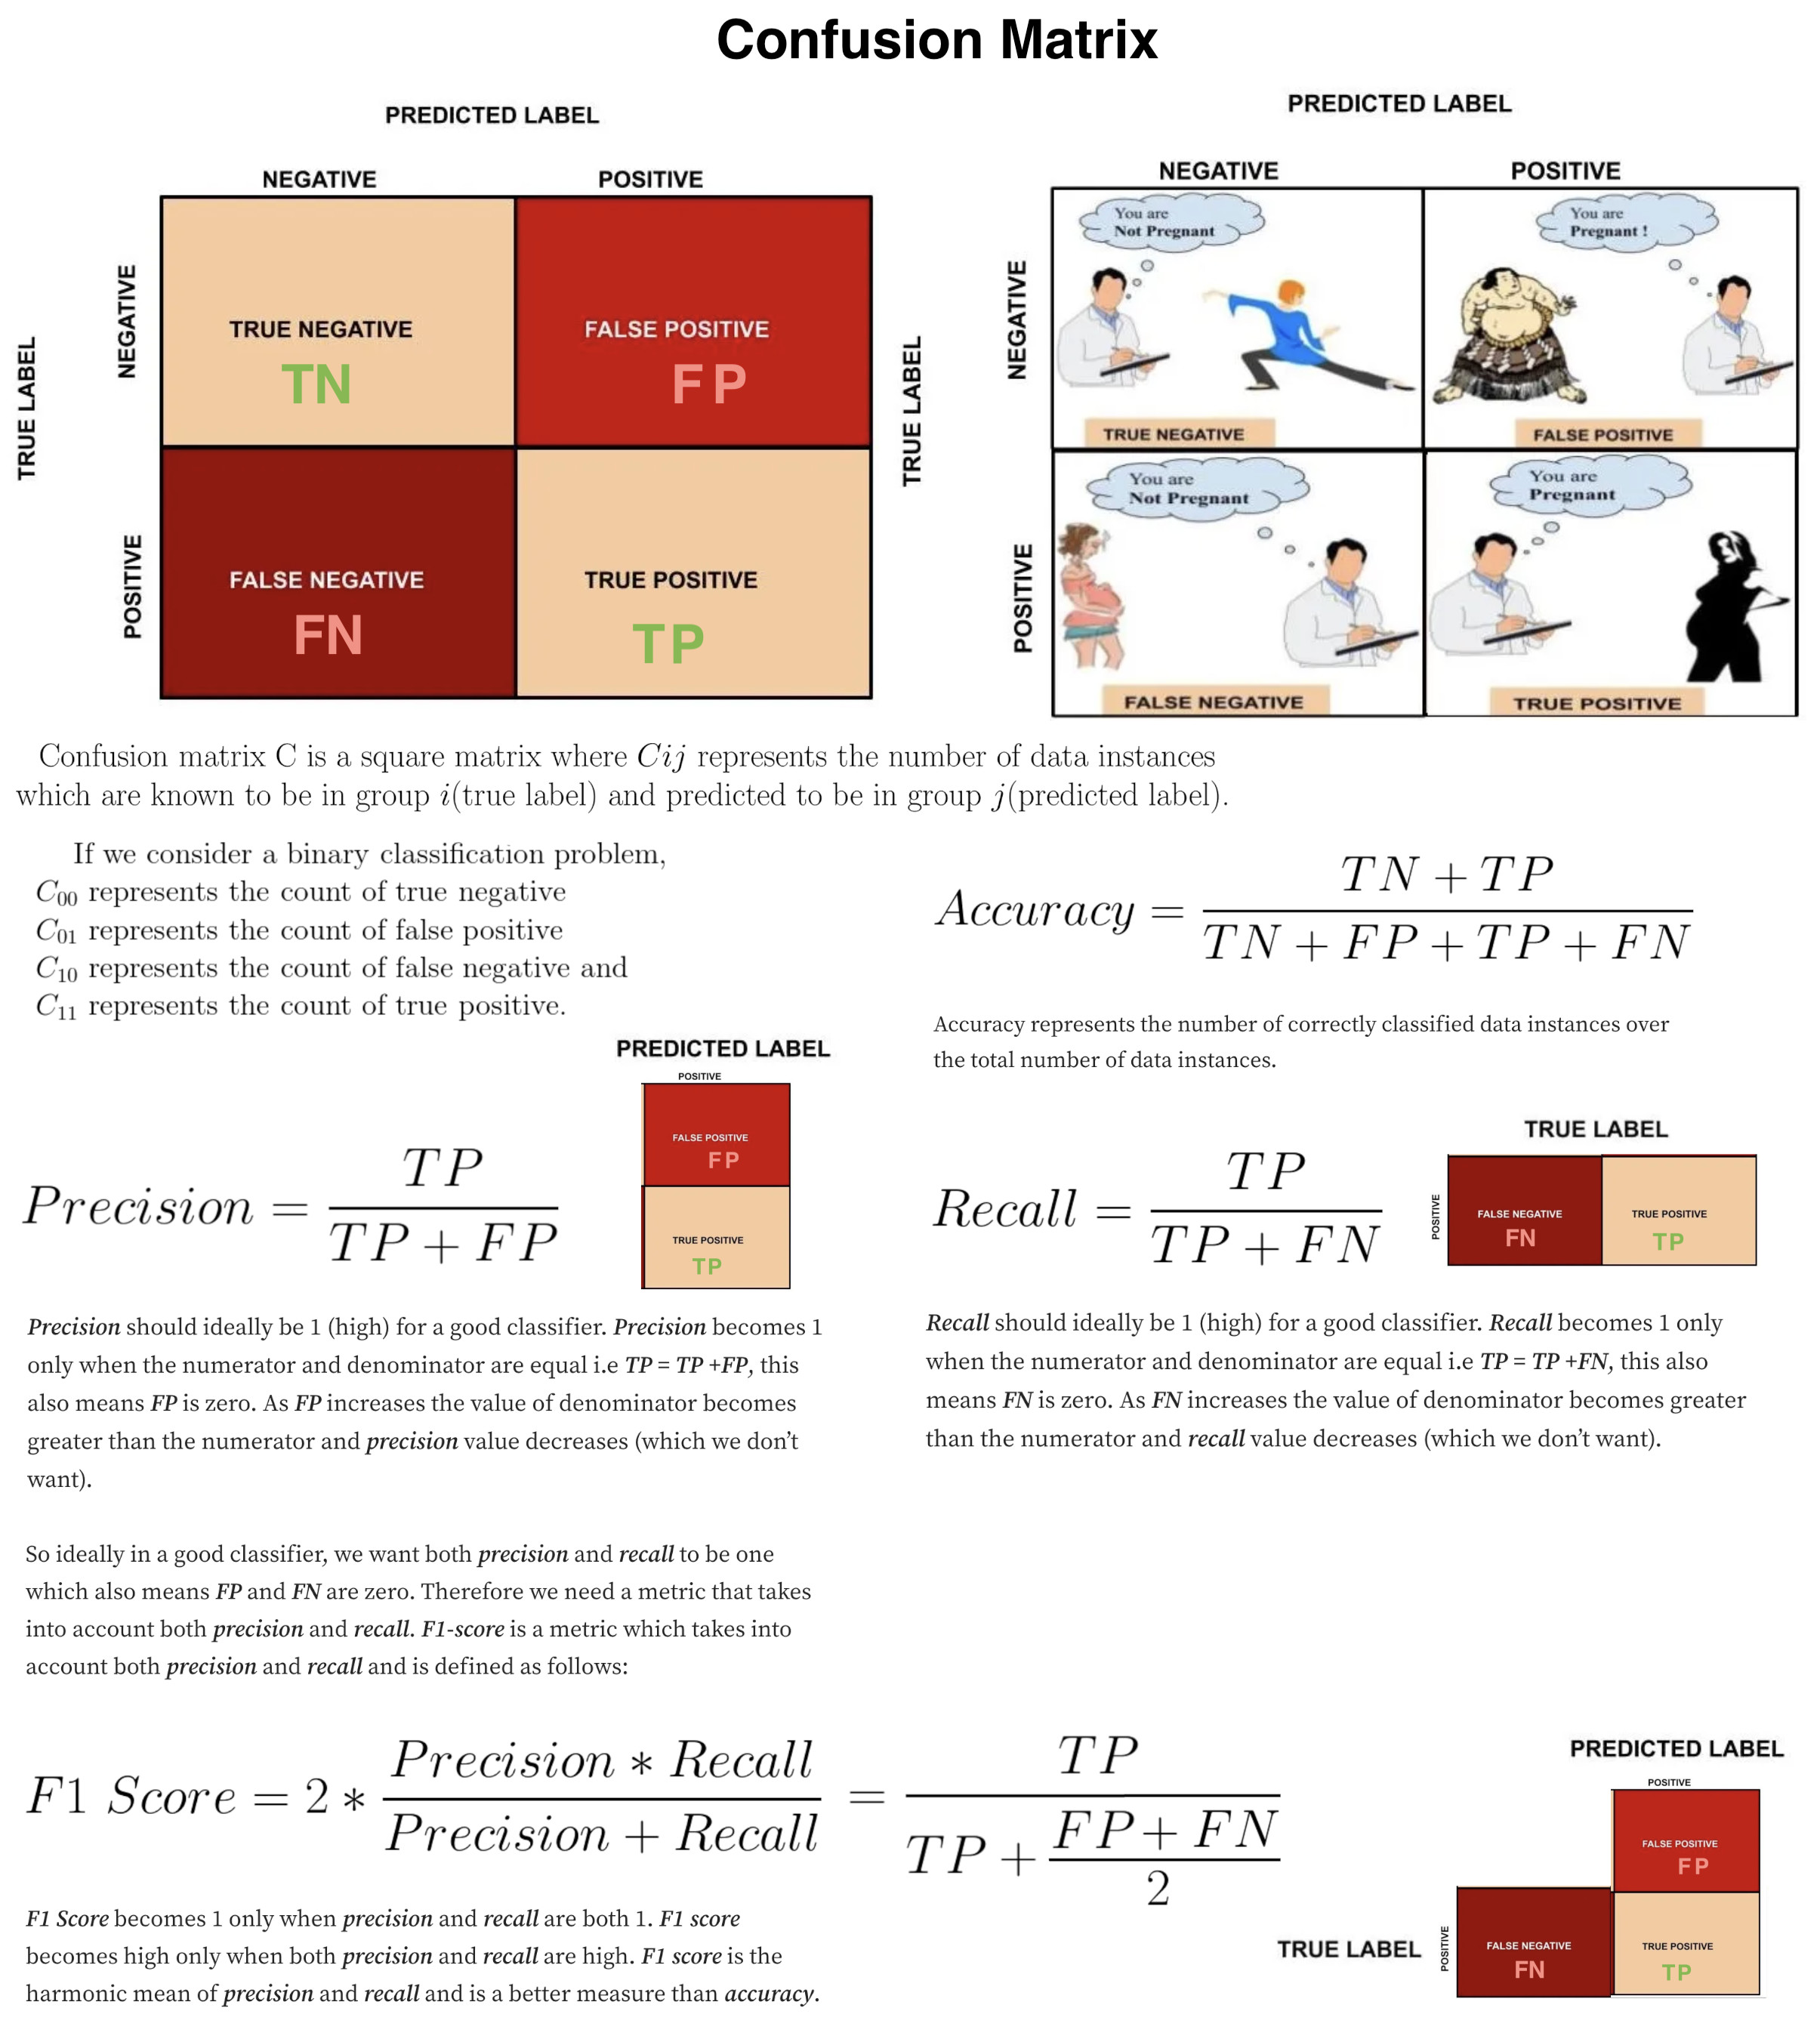